# Abstract

This dataset provides a comprehensive overview of various laptop specifications and their pricing. It encompasses data from multiple manufacturers, highlighting diversity in the laptop market. Key attributes include the company name, type of laptop, RAM capacity, weight, and price. Additionally, the dataset delves into specific features such as touchscreen capability, IPS technology presence, and pixel per inch (PPI) density, offering insights into the display quality of the laptops. It further categorizes the central processing units (CPUs) by brand, and details the storage options in terms of HDD and SSD capacities. The inclusion of GPU brand and operating system type adds another dimension to the analysis, allowing for a multifaceted understanding of the laptops' performance and user preferences.



# Installing Dependencies and Importing Libraries

In [ ]:
!pip install eli5
!pip install h2o
!pip install graphviz
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=e4eb8845d085bf8c26bb250b114c42568d8fe4198e609c2cca0ffcf93311d0c6
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance

# Data Cleaning and Feature Engineering

In [ ]:
#Reading the Marketting campaign Dataset
data = pd.read_csv("https://raw.githubusercontent.com/Vamsi2215/Data-science-6105-/main/laptop_data_cleaned.csv", sep=",")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


Using data.info() we have the following information-

1) 5 integer data types,

2) 5 categorical data type

3) 3 floating point data type

In [ ]:
#pandas by default only displays 20 columns max, to view all 28 columns in output we set max_columns to None
pd.options.display.max_columns = None
data.head()

Company   TypeName  Ram  Weight      Price  TouchScreen  Ips         Ppi  \
0   Apple  Ultrabook    8    1.37  11.175755            0    1  226.983005   
1   Apple  Ultrabook    8    1.34  10.776777            0    0  127.677940   
2      HP   Notebook    8    1.86  10.329931            0    0  141.211998   
3   Apple  Ultrabook   16    1.83  11.814476            0    1  220.534624   
4   Apple  Ultrabook    8    1.37  11.473101            0    1  226.983005   

       Cpu_brand  HDD  SSD Gpu_brand      Os  
0  Intel Core i5    0  128     Intel     Mac  
1  Intel Core i5    0    0     Intel     Mac  
2  Intel Core i5    0  256     Intel  Others  
3  Intel Core i7    0  512       AMD     Mac  
4  Intel Core i5    0  256     Intel     Mac

# Null Values

In [ ]:
#checking if the any data is missing
percent_missing = data.isnull().sum() * 100 / len(data)
null_values_total = data.isnull().sum()
missing_value_df = pd.DataFrame({
                                 'Missing_Total' : null_values_total,
                                 'percent_missing': percent_missing,
                                 })
missing_value_df

Missing_Total  percent_missing
Company                  0              0.0
TypeName                 0              0.0
Ram                      0              0.0
Weight                   0              0.0
Price                    0              0.0
TouchScreen              0              0.0
Ips                      0              0.0
Ppi                      0              0.0
Cpu_brand                0              0.0
HDD                      0              0.0
SSD                      0              0.0
Gpu_brand                0              0.0
Os                       0              0.0

There are several ways to handle null-values :

1) We can delete the rows containing null-values

2) We can impute the mean value

3) We can input the mean value of a specific population

4) We can use a model to predict missing values

# Numeric data distribution

In [ ]:
data.describe()

Ram       Weight        Price  TouchScreen          Ips  \
count  1273.000000  1273.000000  1273.000000  1273.000000  1273.000000   
mean      8.447761     2.041100    10.828218     0.146897     0.279654   
std       5.098771     0.669241     0.619565     0.354142     0.449006   
min       2.000000     0.690000     9.134616     0.000000     0.000000   
25%       4.000000     1.500000    10.387379     0.000000     0.000000   
50%       8.000000     2.040000    10.872255     0.000000     0.000000   
75%       8.000000     2.310000    11.287447     0.000000     1.000000   
max      64.000000     4.700000    12.691441     1.000000     1.000000   

               Ppi          HDD          SSD  
count  1273.000000  1273.000000  1273.000000  
mean    146.950812   413.715632   186.252946  
std      42.926775   518.054486   186.531571  
min      90.583402     0.000000     0.000000  
25%     127.335675     0.000000     0.000000  
50%     141.211998     0.000000   256.000000  
75%     157.350512  1000.000000   256.000000  
max     352.465147  2000.000000  1024.000000

<ipython-input-11-714ee6a5b18e>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(),rotation=45)


[Text(0, 0, 'Ram'),
 Text(1, 0, 'Weight'),
 Text(2, 0, 'Price'),
 Text(3, 0, 'Ips'),
 Text(4, 0, 'HDD'),
 Text(5, 0, 'Ppi'),
 Text(6, 0, 'SSD')]

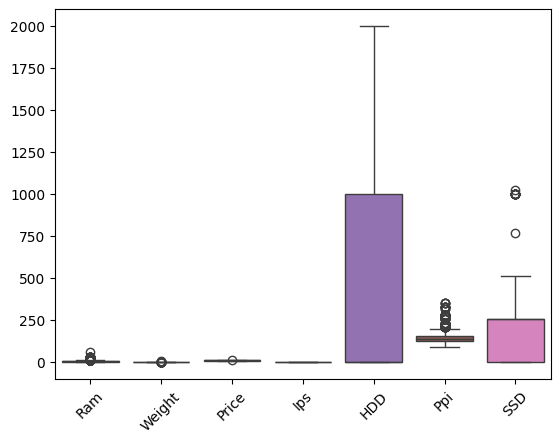

In [ ]:
data_f=data[["Ram",	"Weight"	,"Price",	"Ips","HDD", "Ppi",	"SSD"]]
x = sns.boxplot(data=data_f)
x.set_xticklabels(x.get_xticklabels(),rotation=45)

data.describe() gives us an estimate of the numeric distribution of data

<Axes: xlabel='Ram', ylabel='Price'>

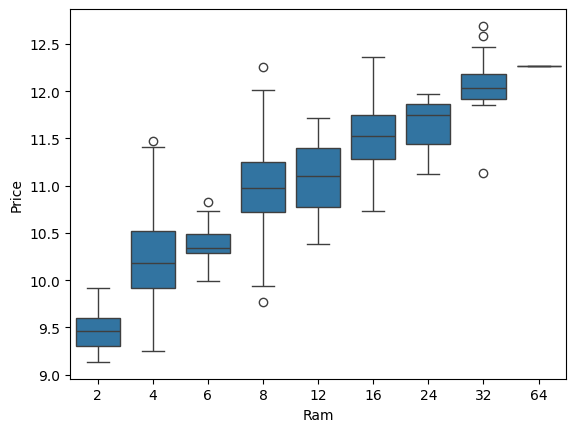

In [ ]:
sns.boxplot( x = 'Ram',y = 'Price', data = data)

Notice we have ommited outliers to get a better visual representation of the **boxplot**

In [ ]:
print(data['Price'].quantile(0.99))

12.030845480331307


<Axes: xlabel='SSD', ylabel='Price'>

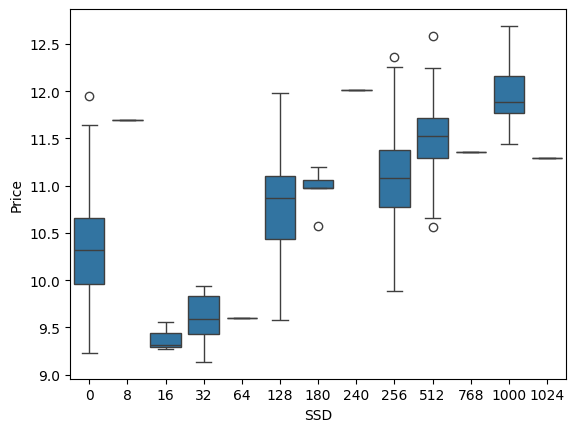

In [ ]:
sns.boxplot( x = 'SSD',y = 'Price', data = data)

# Data Transformation

<ipython-input-19-e4de275c286c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')


<Axes: >

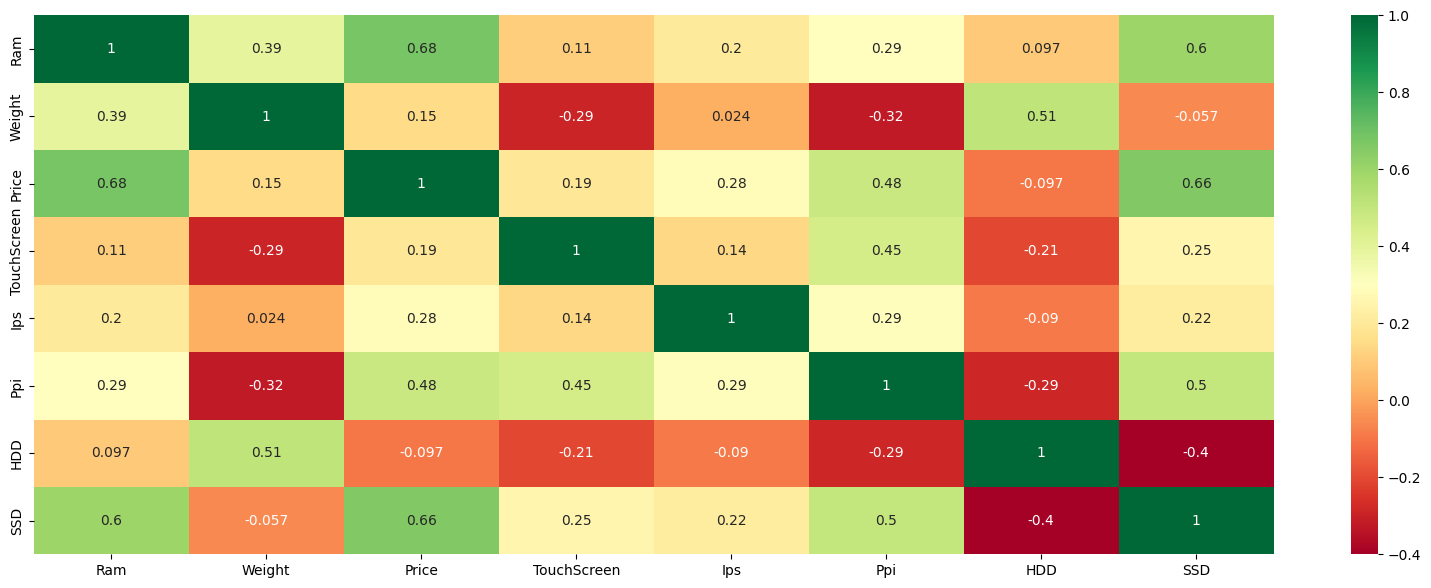

In [ ]:
#The heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

Above Correlation shows there are very few variables closely related

<ipython-input-21-e4de275c286c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')


<Axes: >

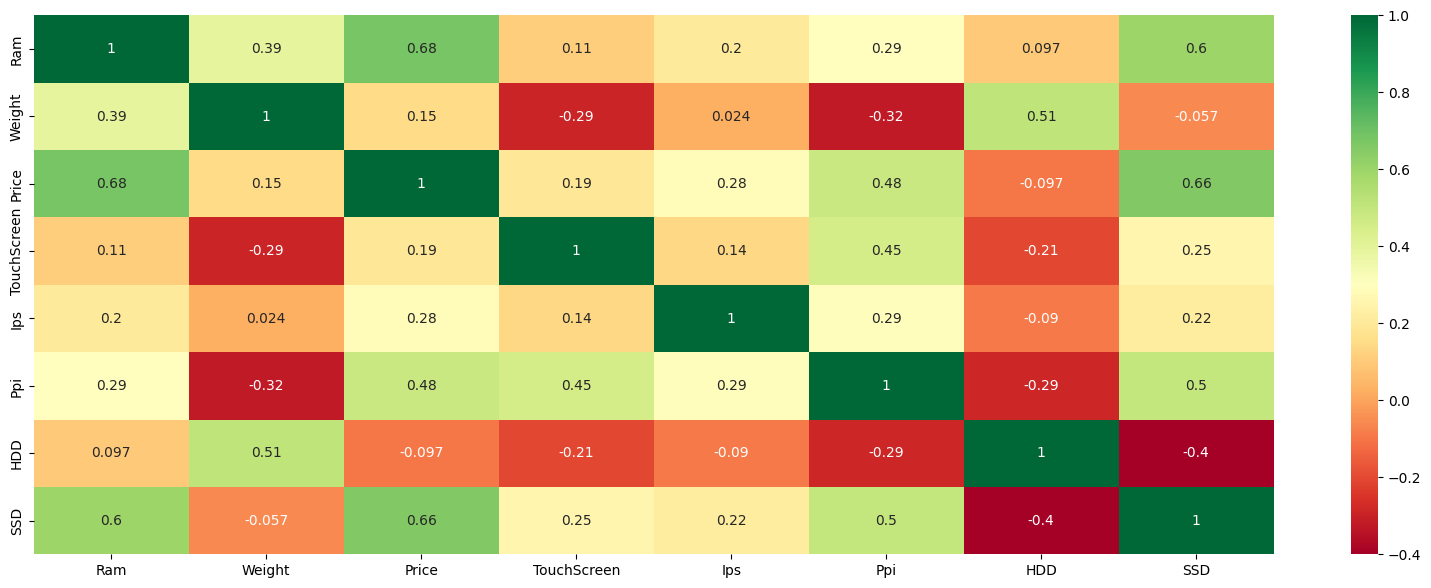

In [ ]:
#The heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

# Removing Outliners

In [ ]:
data.Price.quantile(0.99)

12.030845480331307

In [ ]:
data.drop(data[data['Price'] >= 12].index, inplace = True)

<ipython-input-26-db59ea58dff6>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(),rotation=45)


[Text(0, 0, 'Ram'),
 Text(1, 0, 'Weight'),
 Text(2, 0, 'Price'),
 Text(3, 0, 'TouchScreen'),
 Text(4, 0, 'Ips'),
 Text(5, 0, 'Ppi'),
 Text(6, 0, 'HDD'),
 Text(7, 0, 'SSD')]

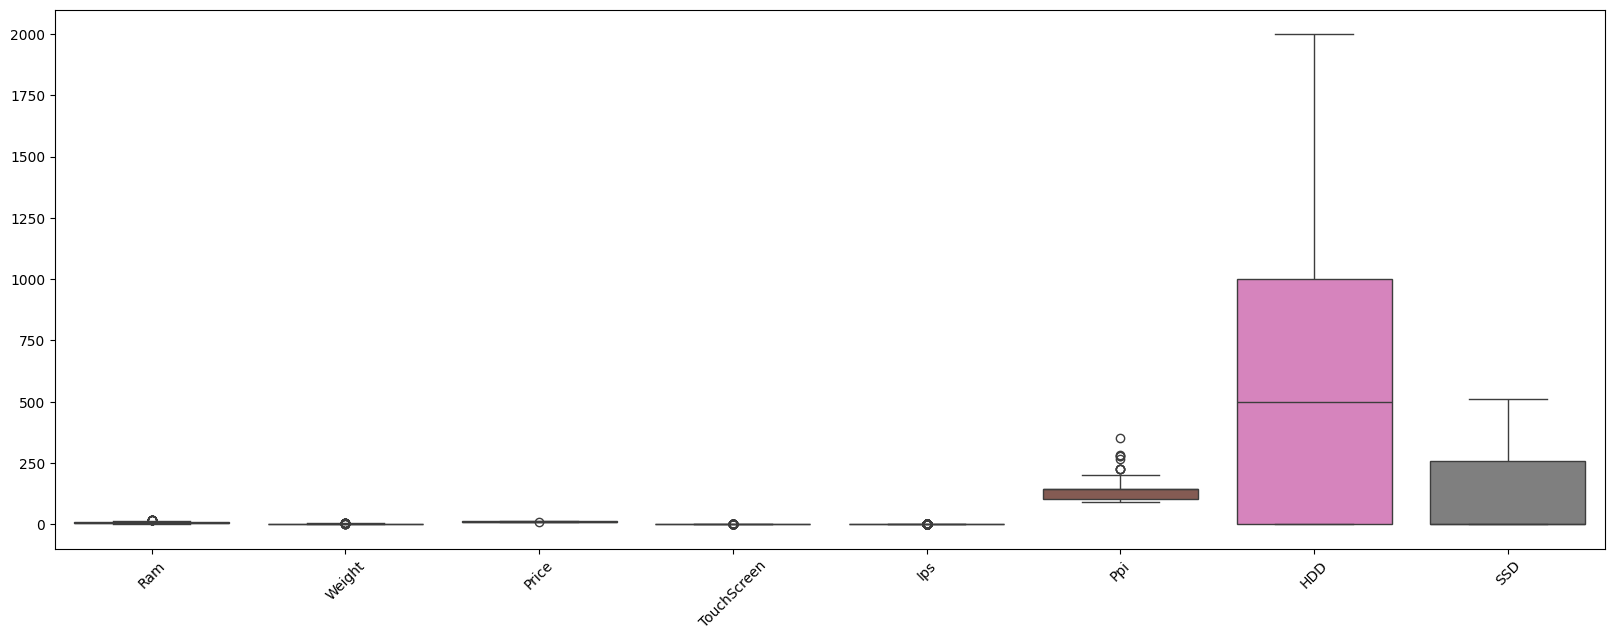

In [ ]:
plt.figure(figsize=(20,7))
x = sns.boxplot(data=data)
x.set_xticklabels(x.get_xticklabels(),rotation=45)

# LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Selecting features and target variable
features = ['Ram', 'Weight', 'TouchScreen', 'Ips', 'Ppi', 'HDD', 'SSD']
target = 'Price'

# Preparing the data
X = data[features]
y = data[target]

# Splitting data into Training 76.5%, Validation set 13.5% and Test set 10%
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Evaluating the model on the training set
train_score = lin_reg.score(X_train, y_train)

# Predicting on validation set and calculating RMSE
y_val_pred = lin_reg.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

train_score, val_rmse


(0.5058668830342986, 0.3304962450384844)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predicting on test set
y_test_pred = lin_reg.predict(X_test)

# Calculating regression metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

test_mae, test_mse, test_rmse, test_r2


(0.25644699197231, 0.10620174334522915, 0.3258860895239764, 0.4103892554936015)

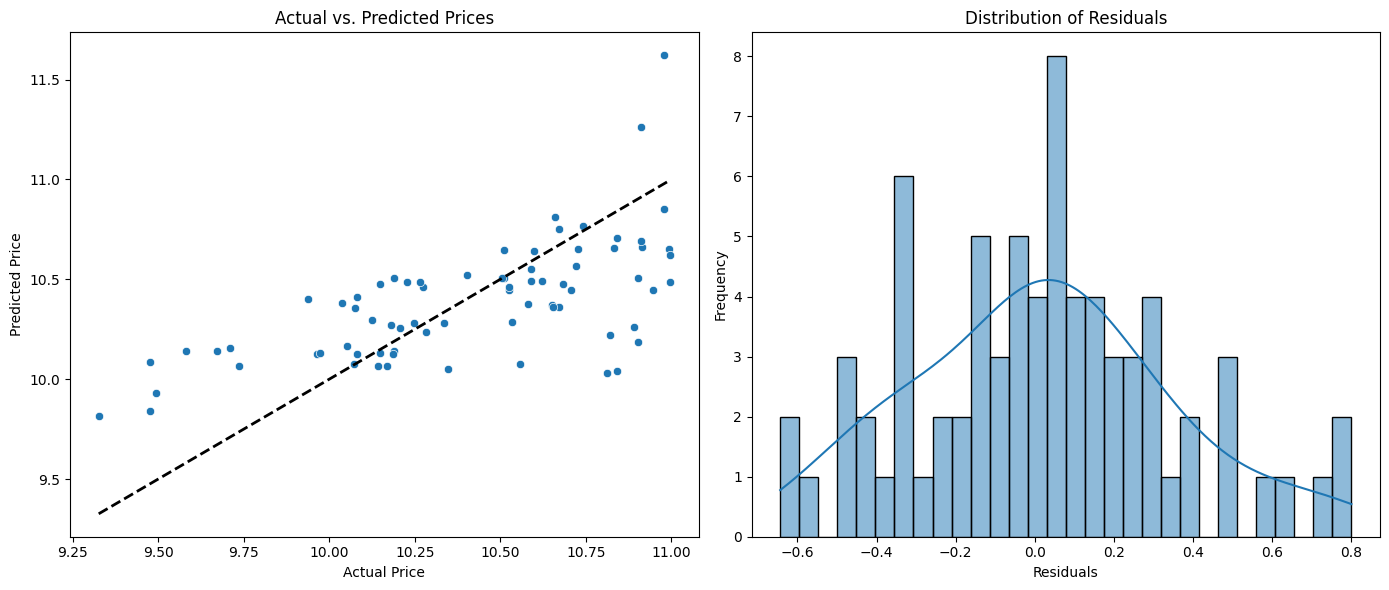

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Actual vs. Predicted prices
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line for perfect predictions
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')

# Plotting the distribution of residuals
residuals = y_test - y_test_pred

plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset

data = pd.read_csv("https://raw.githubusercontent.com/Vamsi2215/Data-science-6105-/main/laptop_data_cleaned.csv")


# Assume 'Category' is the target categorical variable and 'features' are the predictors
target = 'Os'
features = data.drop(target, axis=1)

# Encoding categorical variables (if any)
label_encoders = {}
for column in features.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    features[column] = label_encoders[column].fit_transform(features[column])

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features, data[target], test_size=0.2, random_state=42)

# Initialize the classifier
classifier = RandomForestClassifier(random_state=42)

# Train the model
classifier.fit(X_train, y_train)

# Make predictions
predictions = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Output the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9019607843137255
Confusion Matrix:
 [[  3   0   0]
 [  0  13  20]
 [  0   5 214]]


# Normalization

<ipython-input-39-db59ea58dff6>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(),rotation=45)


[Text(0, 0, 'Ram'),
 Text(1, 0, 'Weight'),
 Text(2, 0, 'Price'),
 Text(3, 0, 'TouchScreen'),
 Text(4, 0, 'Ips'),
 Text(5, 0, 'Ppi'),
 Text(6, 0, 'HDD'),
 Text(7, 0, 'SSD')]

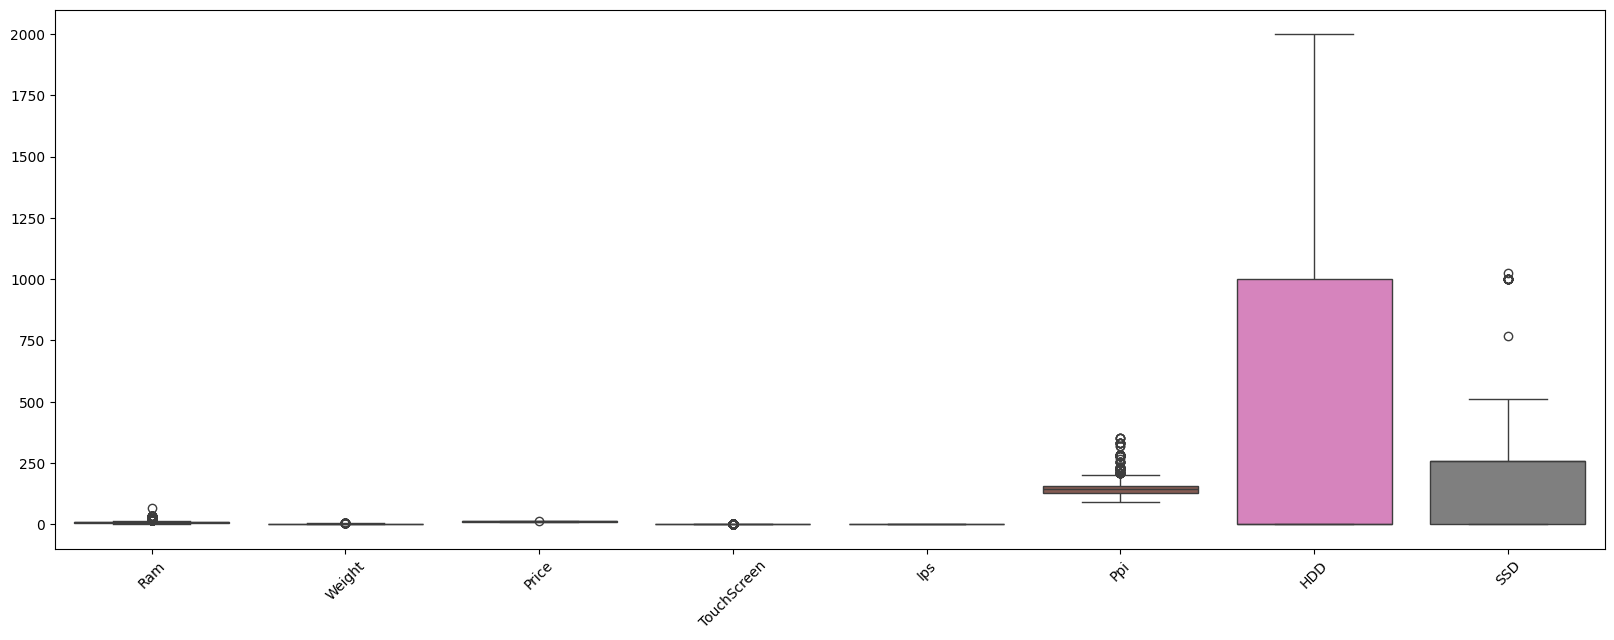

In [ ]:
plt.figure(figsize=(20,7))
x = sns.boxplot(data=data)
x.set_xticklabels(x.get_xticklabels(),rotation=45)

Box plot shows Income having outliers and there is a vast difference between range of values between Income and other columns. We need to normalize data so all variables have equal weightage

<Figure size 800x500 with 0 Axes>

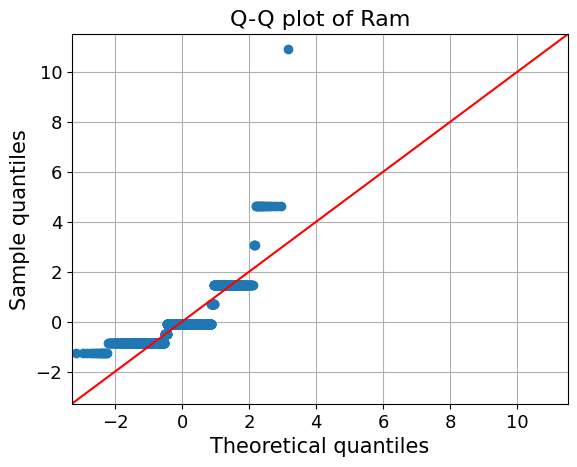

<Figure size 800x500 with 0 Axes>

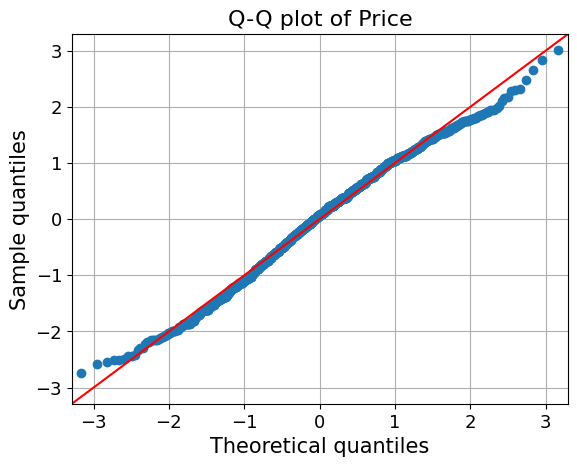

<Figure size 800x500 with 0 Axes>

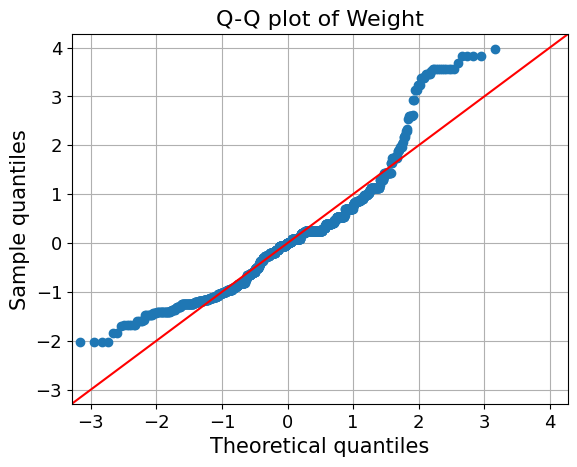

<Figure size 800x500 with 0 Axes>

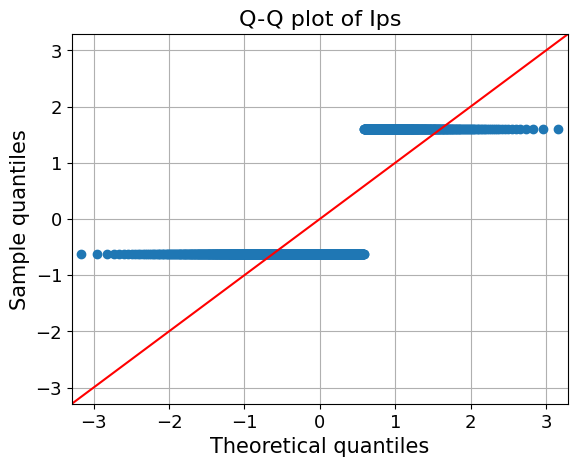

<Figure size 800x500 with 0 Axes>

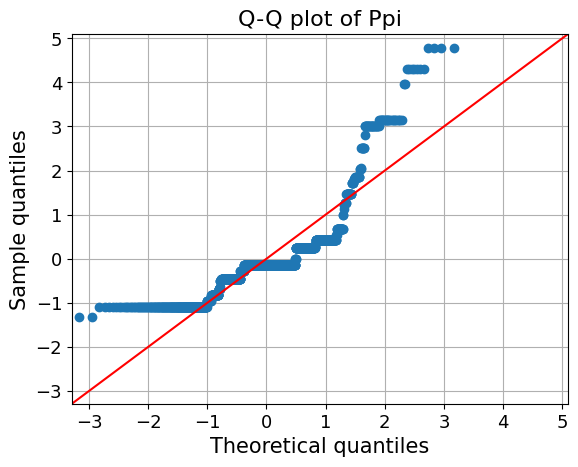

<Figure size 800x500 with 0 Axes>

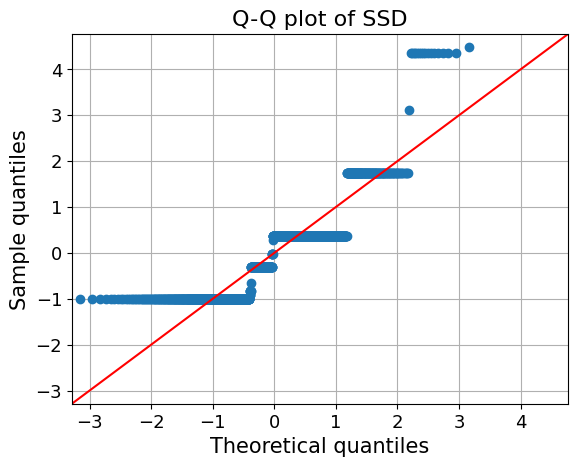

In [ ]:
#checking the distribution of independent variables
data = data.dropna()
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['Ram','Price','Weight','Ips','Ppi','SSD']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

1) Q-Q plots show most of the data is normally distributed.

2) There are few Outliers in Income and age.

# Inputation Methods

In [ ]:
from sklearn.impute import KNNImputer
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

In [ ]:
#checking if the any data is missing
def checkMissing(dataset):
  percent_missing = dataset.isnull().sum() * 100 / len(data)
  null_values_total = dataset.isnull().sum()
  missing_value_df = pd.DataFrame({
                                  'Missing_Total' : null_values_total,
                                  'percent_missing': percent_missing,
                                  })
  return missing_value_df

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def print_Errors(column,number_1_idx,data_original,data_filled):
  # The mean squared error
  data_mn = data_filled.iloc[number_1_idx]
  data_og = data_original.iloc[number_1_idx]
  print("=--- Error values for ",column," ------")
  print('Mean squared error: %.2f'% mean_squared_error(data_og[column], data_mn[column]))
  # The coefficient of determination: 1 is perfect prediction
  print('Coefficient of determination: %.2f'% r2_score(data_og[column], data_mn[column]))
  r2 = r2_score(data_og[column], data_mn[column])
  print('R^2 score on test set =',r2)

# Inputation by Average

In [ ]:
def check_missing(df):
    """
    Prints the number of missing values and the percentage of missing values for each column in a DataFrame.

    Parameters:
    df (DataFrame): The DataFrame to be checked.

    Returns:
    DataFrame: A DataFrame with the missing values count and percentage for each column.
    """
    missing_total = df.isnull().sum().sort_values(ascending=False)
    percent_missing = (missing_total / len(df)) * 100
    missing_data = pd.DataFrame({'Missing_Total': missing_total, 'Percent_Missing': percent_missing})
    return missing_data[missing_data['Missing_Total'] > 0]

# Using the above function to check for missing data in df_missing
missing_info = check_missing(df_missing)
missing_info


Missing_Total  Percent_Missing
Price             127         9.976434
Weight             63         4.948940
Ram                12         0.942655

In [ ]:
number_1_idx = list(np.where(df_missing['Price'].isna())[0])
number_5_idx = list(np.where(df_missing['Weight'].isna())[0])
number_10_idx = list(np.where(df_missing['Ram'].isna())[0])

In [ ]:
df_missing['Price'].fillna(value=df_missing['Price'].mean(), inplace=True)
df_missing['Weight'].fillna(value=df_missing['Weight'].mean(), inplace=True)
df_missing['Ram'].fillna(value=df_missing['Ram'].mean(), inplace=True)

In [ ]:
print_Errors("Price",number_1_idx,data,df_missing)
print_Errors("Weight",number_5_idx,data,df_missing)
print_Errors("Ram",number_10_idx,data,df_missing)

=--- Error values for  Price  ------
Mean squared error: 0.37
Coefficient of determination: -0.01
R^2 score on test set = -0.007832312607640723
=--- Error values for  Weight  ------
Mean squared error: 0.31
Coefficient of determination: -0.00
R^2 score on test set = -0.00023434798943999802
=--- Error values for  Ram  ------
Mean squared error: 25.69
Coefficient of determination: -0.03
R^2 score on test set = -0.032112122734235804


# Categorical Mean

In [ ]:
df_missing = data.copy()

# Remove 1%, 5%, and 10% of three separate columns
create_missing(df_missing, 0.01, 'Price')
create_missing(df_missing, 0.05, 'Weight')
create_missing(df_missing, 0.1, 'Ram')
checkMissing(df_missing)

Missing_Total  percent_missing
Company                  0         0.000000
TypeName                 0         0.000000
Ram                    127         9.976434
Weight                  63         4.948940
Price                   12         0.942655
TouchScreen              0         0.000000
Ips                      0         0.000000
Ppi                      0         0.000000
Cpu_brand                0         0.000000
HDD                      0         0.000000
SSD                      0         0.000000
Gpu_brand                0         0.000000
Os                       0         0.000000

In [ ]:
number_1_idx = list(np.where(df_missing['Price'].isna())[0])
number_5_idx = list(np.where(df_missing['Weight'].isna())[0])
number_10_idx = list(np.where(df_missing['Ram'].isna())[0])

In [ ]:
df_missing['Price'].fillna(value=df_missing['Price'].mean(), inplace=True)
df_missing['Weight'].fillna(value=df_missing['Weight'].mean(), inplace=True)
df_missing['Ram'].fillna(value=df_missing['Ram'].mean(), inplace=True)

In [ ]:
print_Errors("Price",number_1_idx,data,df_missing)
print_Errors("Weight",number_5_idx,data,df_missing)
print_Errors("Ram",number_10_idx,data,df_missing)

=--- Error values for  Price  ------
Mean squared error: 0.18
Coefficient of determination: -0.31
R^2 score on test set = -0.3090531876383469
=--- Error values for  Weight  ------
Mean squared error: 0.58
Coefficient of determination: -0.03
R^2 score on test set = -0.025119204532347617
=--- Error values for  Ram  ------
Mean squared error: 25.20
Coefficient of determination: -0.00
R^2 score on test set = -0.00015455186792756592


# KNN Inpute

In [ ]:
df_missing = data.copy()

# Remove 1%, 5%, and 10% of three separate columns
create_missing(df_missing, 0.01, 'Price')
create_missing(df_missing, 0.05, 'Weight')
create_missing(df_missing, 0.1, 'Ram')
checkMissing(df_missing)

Missing_Total  percent_missing
Company                  0         0.000000
TypeName                 0         0.000000
Ram                    127         9.976434
Weight                  63         4.948940
Price                   12         0.942655
TouchScreen              0         0.000000
Ips                      0         0.000000
Ppi                      0         0.000000
Cpu_brand                0         0.000000
HDD                      0         0.000000
SSD                      0         0.000000
Gpu_brand                0         0.000000
Os                       0         0.000000

In [ ]:
number_1_idx = list(np.where(df_missing['Price'].isna())[0])
number_5_idx = list(np.where(df_missing['Weight'].isna())[0])
number_10_idx = list(np.where(df_missing['Ram'].isna())[0])

# Making Predictions

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


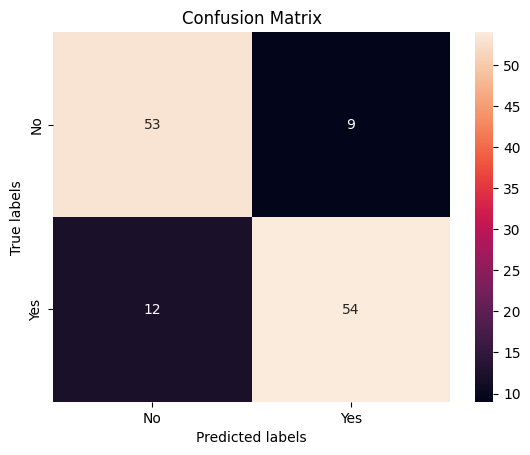

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Example threshold to categorize the laptops (this threshold is arbitrary and should be set according to your context)
price_threshold = data['Price'].median()

# Create binary labels for classification
data['Expensive'] = data['Price'] > price_threshold

# Selecting features for classification
features = ['Ram', 'Weight', 'TouchScreen', 'Ips', 'Ppi', 'HDD', 'SSD']
# Binary target
target = 'Expensive'

# Splitting data (the dataset has been preprocessed accordingly)
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on test set
y_pred = logreg.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])
plt.show()


Above confusion matrix shows a good percentage of testing data is accurately predicted

In [ ]:
print(classification_report(y_test, y_pred))
#classification report for logistic model prediction

              precision    recall  f1-score   support

       False       0.82      0.85      0.83        62
        True       0.86      0.82      0.84        66

    accuracy                           0.84       128
   macro avg       0.84      0.84      0.84       128
weighted avg       0.84      0.84      0.84       128



We have a higher precision for "No" i.e 0 of 0.91 while precision for "Yes" is 0.62 indicating we have a more accurate prediction chance for a negative customer response

In [ ]:
#Understanding the important features
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(logreg, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Features in increasing order of significance as evident from permutaion importance

1. Ram
2. SSD
3. Ppi
4. Weight
5. HDD
6. TounchScreen
7. Ips

# Interpreing Regression Coefficients

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['Price'], data[["Ram",	"SSD",	"Ppi",	"Weight",
                                       "HDD"	,"TouchScreen",	"Ips"]]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              7868.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):                        0.00
Time:                        19:04:17   Log-Likelihood:                         -2425.0
No. Observations:                1273   AIC:                                      4864.
Df Residuals:                    1266   BIC:                                      4900.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Ram            -0.0505      0.014     -3.690      0.000      -0.077      -0.024
SSD         -3.598e-05      0.000     -0.092      0.927      -0.001       0.001
Ppi             0.0429      0.001     49.538      0.000       0.041       0.045
Weight          2.4436      0.067     36.245      0.000       2.311       2.576
HDD            -0.0003      0.000     -2.765      0.006      -0.001   -9.43e-05
TouchScreen    -0.2964      0.147     -2.012      0.044      -0.585      -0.007
Ips            -0.4082      0.107     -3.822      0.000      -0.618      -0.199
==============================================================================
Omnibus:                      415.548   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1543.207
Skew:                          -1.555   Prob(JB):                         0.00
Kurtosis:                       7.407   Cond. No.                     2.19e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Interpretting the Regression Coefficients

Intercept (
β
0
​
 ) **bold text**:

This is the expected mean value of the dependent variable when all the independent variables are set to zero. It’s the y-intercept of the regression line. In contexts where zero for all predictors isn’t meaningful or possible (e.g., negative weights or distances), the intercept may have no practical interpretation and simply ensures that the regression line fits the data.

Slope Coefficients (
β
i
​
 ) **bold text**:

Each slope coefficient represents the estimated change in the dependent variable for a one-unit change in the corresponding independent variable, keeping all other independent variables constant.
If
(
β
i
​
 )
   is positive, there is a positive association between the independent variable
(   
X
i
​
 ) and the dependent variable. As
(
X
i
​
) increases, the dependent variable is expected to increase by
(
β
i
​
 )
  units.
Conversely, if
(
β
i
​
 )
  is negative, there is a negative association. As
(
X
i
​
 ) increases, the dependent variable is expected to decrease by
(
β
i
​
 )
  units.
The magnitude of
β
i
​
  indicates the strength of the association. A larger absolute value of
(
β
i
​
 )
  indicates a stronger relationship.
The unit of
(
β
i
​
 )

  is in terms of the dependent variable's unit per unit of the independent variable
(
X
i
​
)
.

**Standard Error of Coefficients**:

The standard error measures the precision of the coefficient estimate. A smaller standard error indicates a more precise estimate.
It is used to calculate confidence intervals and perform hypothesis tests on the coefficients.

**T-Statistics and P-Values**:

The t-statistic tests whether a coefficient is significantly different from zero (indicating a relationship exists). It is calculated as the coefficient divided by its standard error.

The p-value tells us about the evidence against a null hypothesis that the coefficient is zero. A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

R-squared (
R
2
 ) **bold text**:

Not a coefficient but an important metric; it represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1.

Remove Random Portions of Data: Remove 1%, 5%, and 10% of data randomly from your dataset.

Apply Different Imputation Methods: Three different methods to impute the missing values. Common methods are mean imputation, median imputation, and K-Nearest Neighbors (KNN) imputation.

Evaluate Recovery of Missing Values: Compare the imputed values with the original ones (before removal) to calculate the percentage error on residuals for numeric data.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/Vamsi2215/Data-science-6105-/main/laptop_data_cleaned.csv")


# Choose only numeric columns for simplicity in calculating errors
data_numeric = data.select_dtypes(include=[np.number])

# Split the data into training and test sets
X_train, X_test = train_test_split(data_numeric, test_size=0.2, random_state=42)

# Function to remove a random percentage of data
def remove_random_data(df, percentage):
    df_copy = df.copy()
    for column in df_copy.columns:
        num_missing = int(df_copy[column].shape[0] * percentage)
        missing_indices = np.random.choice(df_copy[column].shape[0], num_missing, replace=False)
        df_copy.iloc[missing_indices, df_copy.columns.get_loc(column)] = np.nan
    return df_copy

# Function to evaluate imputation
def evaluate_imputation(original_data, imputed_data):
    mse = mean_squared_error(original_data, imputed_data)
    return np.sqrt(mse)  # Return RMSE for easier interpretation

# Imputation methods
imputers = {
    'mean': SimpleImputer(strategy='mean'),
    'median': SimpleImputer(strategy='median'),
    'knn': KNNImputer(n_neighbors=5)
}

# Percentages of data to remove
percentages = [0.01, 0.05, 0.10]

# Store results
results = {}

for percentage in percentages:
    X_train_missing = remove_random_data(X_train, percentage)
    results[percentage] = {}

    for name, imputer in imputers.items():
        imputed = imputer.fit_transform(X_train_missing)
        rmse = evaluate_imputation(X_train, imputed)
        results[percentage][name] = rmse

# Display the results
for percentage, methods in results.items():
    print(f"\nPercentage of data removed: {percentage * 100}%")
    for method, rmse in methods.items():
        print(f"Imputation Method: {method}, RMSE: {rmse}")



Percentage of data removed: 1.0%
Imputation Method: mean, RMSE: 18.341022390186282
Imputation Method: median, RMSE: 25.19012046193965
Imputation Method: knn, RMSE: 9.75442157357621

Percentage of data removed: 5.0%
Imputation Method: mean, RMSE: 51.452006988203145
Imputation Method: median, RMSE: 66.25848274346787
Imputation Method: knn, RMSE: 32.337638661861575

Percentage of data removed: 10.0%
Imputation Method: mean, RMSE: 61.47183462744254
Imputation Method: median, RMSE: 77.95842224170518
Imputation Method: knn, RMSE: 39.213930978843585


# SHAP Analysis for Linear and Tree-Based Models

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Vamsi2215/Data-science-6105-/main/laptop_data_cleaned.csv")

In [ ]:
X = data.drop('Price', axis=1)  # Assuming 'target' is the column you want to predict
y = data['Price']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
x_train_numeric = x_train.apply(pd.to_numeric, errors='coerce')

# Fill NaNs that were introduced by the conversion or already present
x_train_filled = x_train_numeric.fillna(method='ffill').fillna(method='bfill')

Linear Model RMSE: 0.2780543049789205
Tree Model RMSE: 0.2114833836471596


PermutationExplainer explainer: 256it [00:14,  9.61it/s]                         


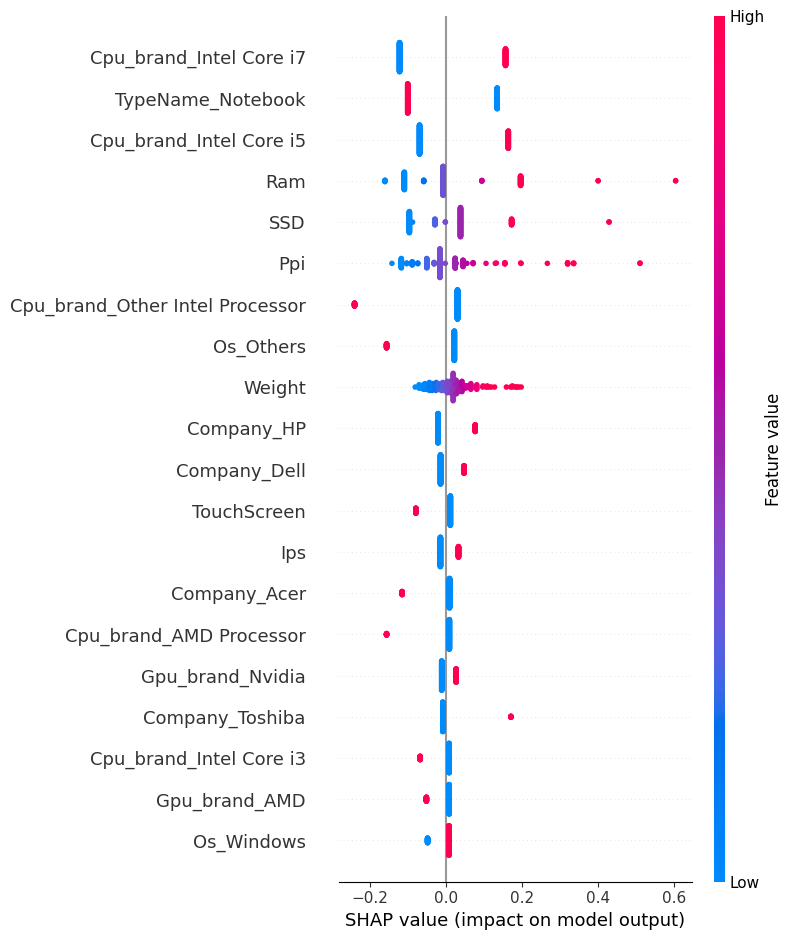

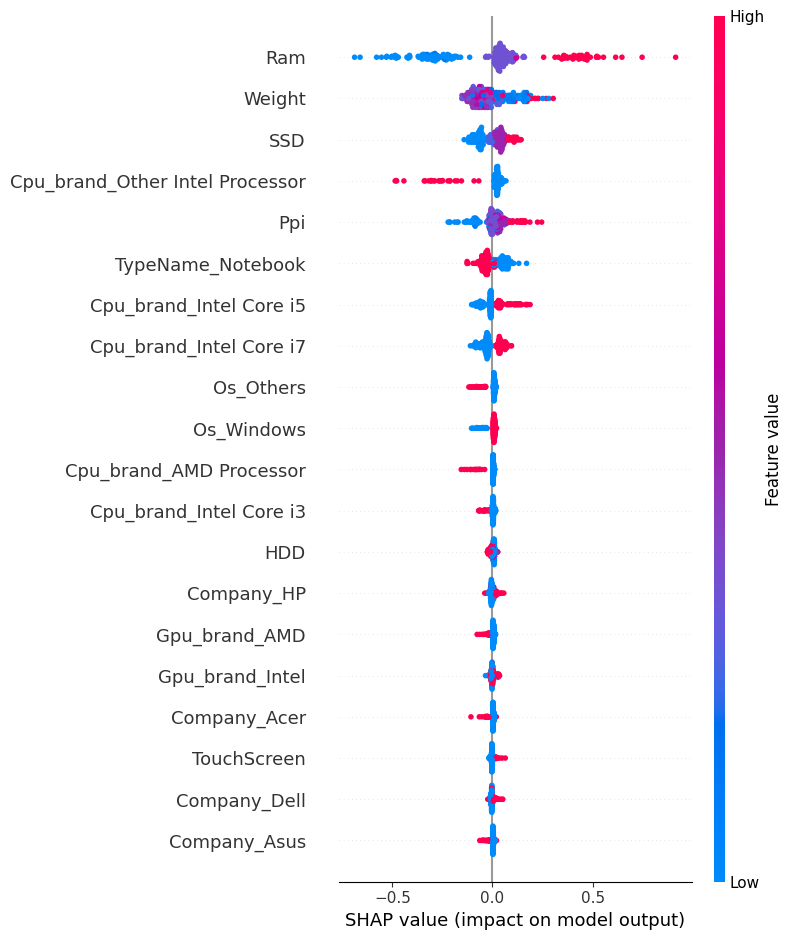

<Figure size 640x480 with 0 Axes>

In [ ]:
# Import necessary libraries
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Load the dataset
laptop_data = pd.read_csv("https://raw.githubusercontent.com/Vamsi2215/Data-science-6105-/main/laptop_data_cleaned.csv")
  # Update this path


# Assuming 'Price' is the target and the rest are features. Adjust as necessary.
X = laptop_data.drop('Price', axis=1)
y = laptop_data['Price']

# Convert categorical variables using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train a tree-based model (Random Forest)
tree_model = RandomForestRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predict and calculate RMSE for both models
y_pred_linear = linear_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)
print(f"Linear Model RMSE: {sqrt(mean_squared_error(y_test, y_pred_linear))}")
print(f"Tree Model RMSE: {sqrt(mean_squared_error(y_test, y_pred_tree))}")

# SHAP analysis
# Linear model
explainer_linear = shap.Explainer(linear_model.predict, X_train)
shap_values_linear = explainer_linear(X_test)
shap.summary_plot(shap_values_linear, X_test, feature_names=X.columns)

# Tree-based model
explainer_tree = shap.Explainer(tree_model, X_train)
shap_values_tree = explainer_tree(X_test)
shap.summary_plot(shap_values_tree, X_test, feature_names=X.columns)

# Save plots if running as a script
plt.savefig('linear_model_shap_summary.png')
plt.savefig('tree_model_shap_summary.png')


PermutationExplainer explainer: 256it [00:11,  3.63it/s]


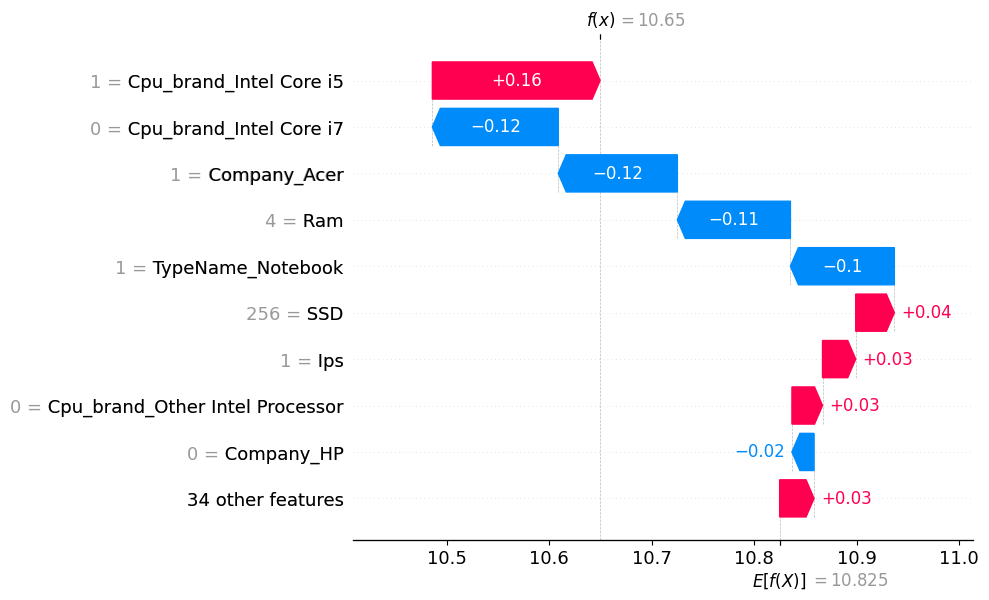

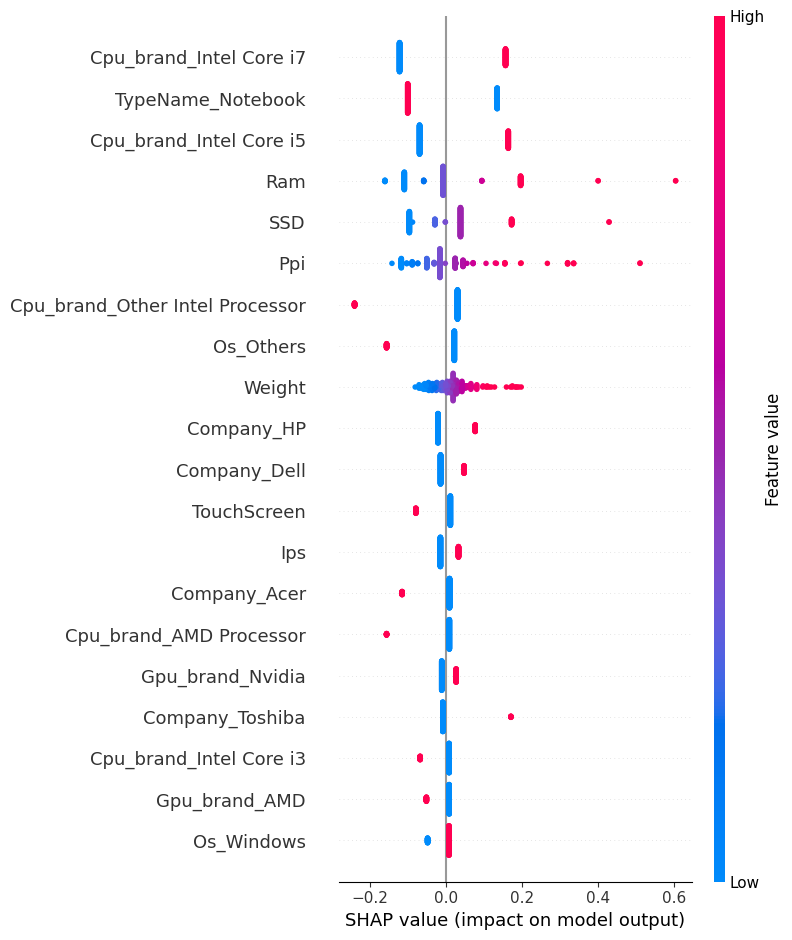

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Example: Load and prepare your data
# This is a placeholder; replace with your actual data loading and preprocessing
# data = pd.read_csv('your_dataset.csv')
# Assume 'X' and 'y' are your features and target variable
# X = data.drop('target_column', axis=1)
# y = data['target_column']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Initialize SHAP Explainer
explainer = shap.Explainer(linear_model.predict, X_train)

# Compute SHAP values
shap_values = explainer(X_test)

# Plot SHAP values for the first prediction
# Note: Adjust the index as needed to explore SHAP values for different predictions
shap.plots.waterfall(shap_values[0])

# To display a summary plot of all features across all test data
shap.summary_plot(shap_values, X_test)

# Save the plot if you're running this script in a non-interactive environment
plt.savefig('shap_linear_model_summary.png')


# SHAP partial dependence plot for linear model

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

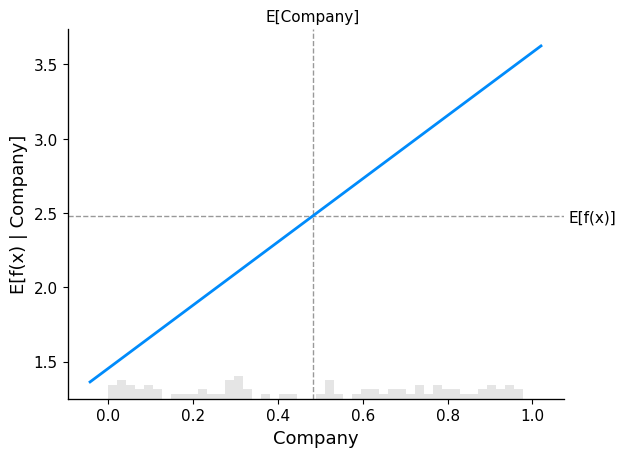

In [ ]:
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Example: Generate a synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 2)
y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.randn(100) * 0.5

# Convert to DataFrame for easier handling
X_df = pd.DataFrame(X, columns=['Company', 'TypeName'])
y_df = pd.Series(y, name='Price')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

# Train a linear model
model = LinearRegression()
model.fit(X_train, y_train)

# Initialize SHAP Explainer
explainer = shap.Explainer(model.predict, X_train)

# Compute SHAP values for the test set
shap_values = explainer(X_test)

# Plot the partial dependence plot for the first feature
shap.partial_dependence_plot(
    "Company", model.predict, X_train, model_expected_value=True,
    feature_expected_value=True, ice=False, shap_values=shap_values[:,0]
)


# SHAP partial dependence plot for a tree based model

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

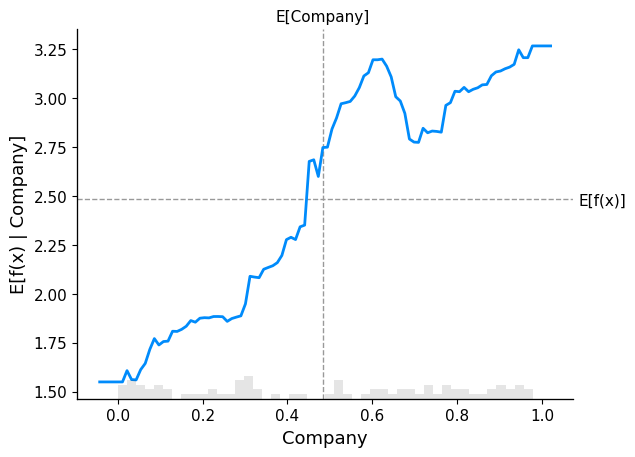

In [ ]:
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Example: Generate a synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 2)
y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.randn(100) * 0.5

# Convert to DataFrame for easier handling
X_df = pd.DataFrame(X, columns=['Company', 'TypeName'])
y_df = pd.Series(y, name='Price')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

# Train a tree-based model (Random Forest in this case)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Initialize SHAP Explainer with the model and training data
explainer = shap.Explainer(model, X_train)

# Compute SHAP values for the test set
shap_values = explainer(X_test)

# Plot the partial dependence plot for the first feature
shap.partial_dependence_plot(
    "Company", model.predict, X_train, model_expected_value=True,
    feature_expected_value=True, ice=False, shap_values=shap_values[:,0]
)


Interpreting SHAP dependence plot for Linear and Tree-based model

Interpreting SHAP dependence plots for both linear and tree-based models provides insights into how the value of a specific feature influences the prediction of the model, either globally (across all data points) or for individual predictions. Here’s how to interpret these plots for both types of models:

Linear Model
For a linear model, SHAP dependence plots can be quite straightforward to interpret because the relationship between features and the target variable is linear by definition. The plot will typically show a straight line indicating that as the feature value increases or decreases, its impact on the prediction linearly increases or decreases in proportion.

1. Slope Direction: The direction of the slope (positive or negative) tells you whether the relationship between the feature and the target is positive (as the feature value increases, so does the prediction) or negative (as the feature value increases, the prediction decreases).

2. Slope Steepness: The steepness of the slope indicates the strength of the relationship. Steeper slopes mean the feature has a stronger influence on the prediction.

3. Divergence from Linearity: While linear models assume a linear relationship, SHAP values can sometimes reveal non-linear patterns if they are present due to interactions with other features. This can be an indication that the linear model is not perfectly capturing the relationship between the feature and the target.

Tree-based Model

For tree-based models, which can capture non-linear relationships and interactions between features, SHAP dependence plots can reveal more complex patterns:

Curve Shape: Unlike the linear model, the plot for a tree-based model might show curves, indicating non-linear relationships. For example, a U-shaped curve suggests that both high and low values of the feature strongly influence the prediction in the same direction, with a weaker influence from mid-range values.

Vertical Dispersion: We may see a lot of vertical dispersion at a given feature value, indicating variability in the SHAP value for the same feature value. This often points to interactions with other features, meaning the impact of the feature on the prediction changes depending on the values of other features.

Color Coding: SHAP plots often use color to represent the value of another feature, highlighting interactions. For instance, if points are colored by a second feature’s value, and you see a pattern in how colors are distributed across the plot (e.g., all high values of another feature cluster in a specific region of the plot), this indicates an interaction effect between the two features.

# Feature Importance of Linear Model

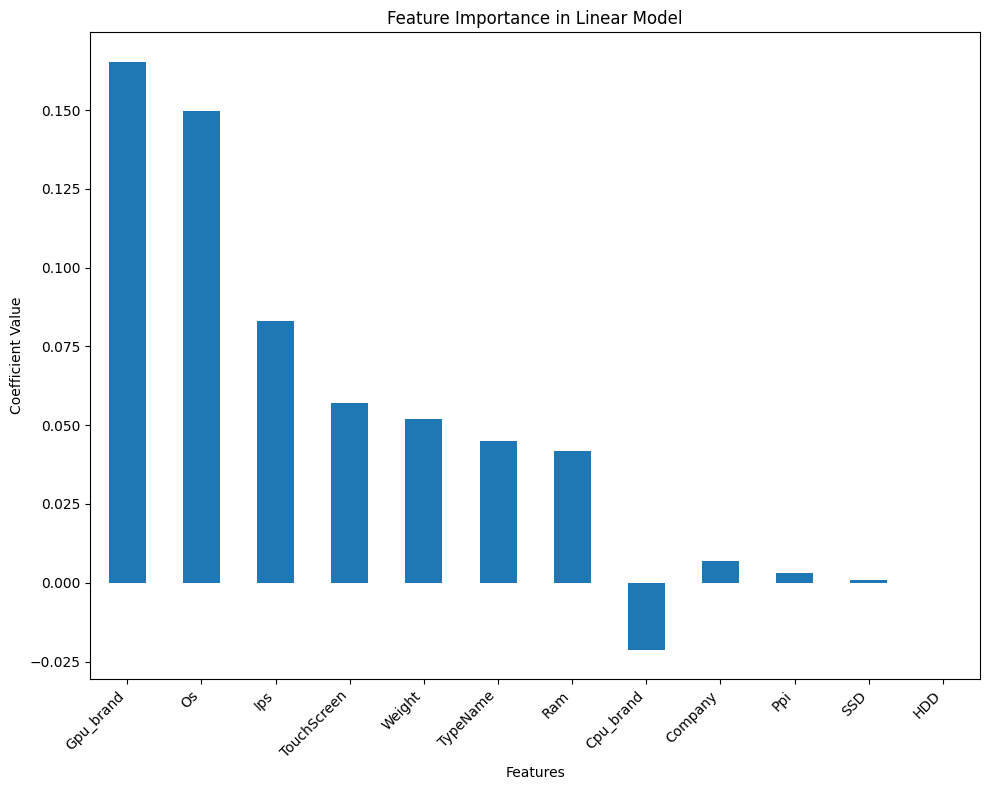

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Example: Load and prepare your data
# This is a placeholder; replace with your actual data loading and preprocessing
# data = pd.read_csv('your_dataset.csv')
# Assume 'X' and 'y' are your features and target variable
# X = data.drop('target_column', axis=1)
# y = data['target_column']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Get the coefficients from the model
coefficients = linear_model.coef_

# Create a series to store coefficients along with feature names for easier plotting
feature_importance = pd.Series(coefficients, index=X_train.columns).sort_values(key=abs, ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
feature_importance.plot(kind='bar')
plt.title('Feature Importance in Linear Model')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Display the plot
plt.show()


# Feature Importance of Tree-Based Model


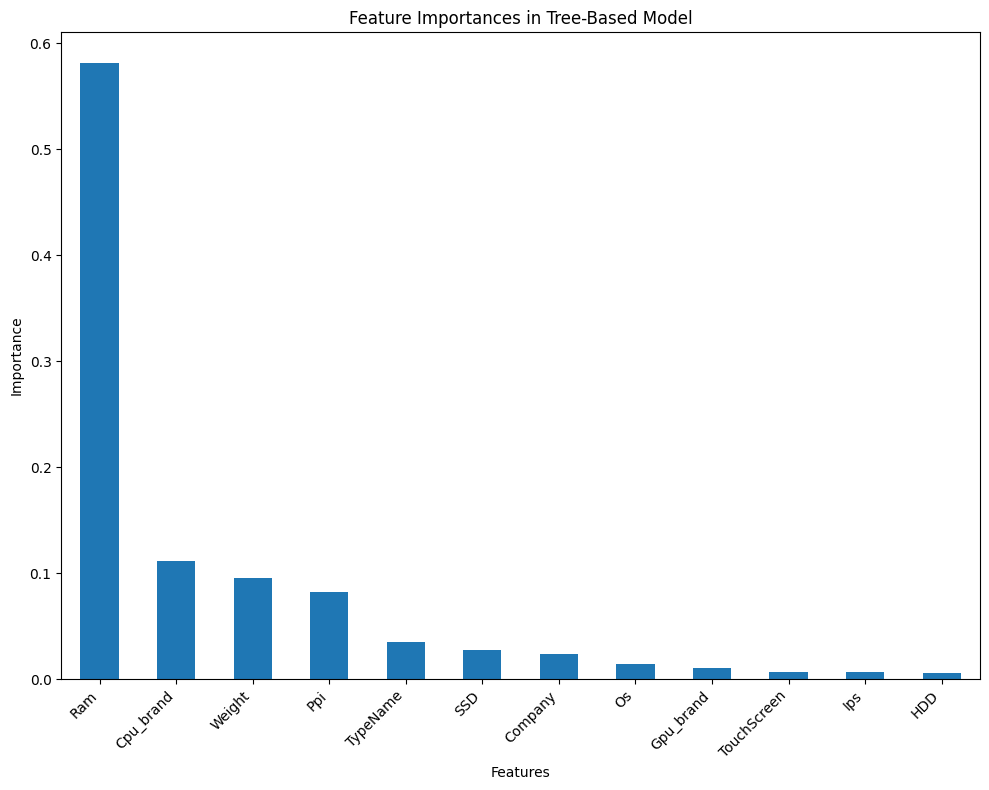

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Example: Load and prepare your data
# This is a placeholder; replace with your actual data loading and preprocessing
# data = pd.read_csv('your_dataset.csv')
# Assume 'X' and 'y' are your features and target variable
# X = data.drop('target_column', axis=1)
# y = data['target_column']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a tree-based model (using Random Forest here as an example)
tree_model = RandomForestRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = tree_model.feature_importances_

# Create a series for easier plotting
features = pd.Series(feature_importances, index=X_train.columns).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
features.plot(kind='bar')
plt.title('Feature Importances in Tree-Based Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Display the plot
plt.show()


# Model Interpretability

In [4]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 4.2 MB/s eta 0:00:00


In [5]:
!apt-get install graphviz -y
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [6]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 2.6 MB/s eta 0:00:00


In [7]:
#Importing required packages
from sklearn.tree import export_graphviz
import graphviz
import h2o
from h2o.automl import H2OAutoML
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestRegressor
pd.options.display.max_columns = None
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmph47_2v51
  JVM stdout: /tmp/tmph47_2v51/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmph47_2v51/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         07 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_rikyvq
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

import h2o: Imports the h2o library, which is a tool for building machine learning models. It's particularly useful for distributed and scalable machine learning tasks.

from h2o.automl import H2OAutoML: Imports the H2OAutoML class from the h2o.automl module. This class is used for automating the machine learning model selection and training process.

import numpy as np: Imports the numpy library and aliases it as np. Numpy is widely used for numerical operations in Python.

import pandas as pd: Imports the pandas library and aliases it as pd. Pandas is a powerful data manipulation library, and it's commonly used for working with tabular data.

import seaborn as sns: Imports the seaborn library, which is used for statistical data visualization. It provides a high-level interface for creating informative and attractive statistical graphics.

import matplotlib.pylab as plt: Imports the matplotlib.pylab module and aliases it as plt. Matplotlib is a popular plotting library in Python.

from sklearn.ensemble import RandomForestRegressor: Imports the RandomForestRegressor class from the sklearn.ensemble module. This is part of the scikit-learn library and is used for building random forest models, which are an ensemble of decision trees for regression tasks.

pd.options.display.max_columns = None: This line sets a Pandas option to display all columns when printing a DataFrame. By setting it to None, it allows you to see all the columns in a DataFrame without truncation

In [8]:
data = pd.read_csv("https://raw.githubusercontent.com/Vamsi2215/Data-science-6105-/main/laptop_data_cleaned.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [9]:
data.head()

Company   TypeName  Ram  Weight      Price  TouchScreen  Ips         Ppi  \
0   Apple  Ultrabook    8    1.37  11.175755            0    1  226.983005   
1   Apple  Ultrabook    8    1.34  10.776777            0    0  127.677940   
2      HP   Notebook    8    1.86  10.329931            0    0  141.211998   
3   Apple  Ultrabook   16    1.83  11.814476            0    1  220.534624   
4   Apple  Ultrabook    8    1.37  11.473101            0    1  226.983005   

       Cpu_brand  HDD  SSD Gpu_brand      Os  
0  Intel Core i5    0  128     Intel     Mac  
1  Intel Core i5    0    0     Intel     Mac  
2  Intel Core i5    0  256     Intel  Others  
3  Intel Core i7    0  512       AMD     Mac  
4  Intel Core i5    0  256     Intel     Mac

# Logistic Regression ( Linear model )

In [10]:
import h2o
from h2o.estimators import H2OGeneralizedLinearEstimator
from sklearn.model_selection import train_test_split
import pandas as pd


# Split data into features and target
X = data.drop('Price', axis=1)
y = data['Price'] #y is target

# Convert Pandas Series to Pandas DataFrame
y = pd.DataFrame(y)

# Convert Pandas DataFrames back to H2OFrame objects
X_h2o = h2o.H2OFrame(X)
y_h2o = h2o.H2OFrame(y)

# Concatenate X and y to create the complete dataset
data_h2o = X_h2o.concat(y_h2o)

# Split the data into training and test sets using H2O split_frame function
train, test = data_h2o.split_frame(ratios=[0.8], seed=42)

# Train the logistic regression model
logistic_model = H2OGeneralizedLinearEstimator(family="gaussian")
logistic_model.train(x=list(X.columns), y="Price", training_frame=train)

# Print a summary of the model
print(logistic_model)

# Make predictions on the test set
predictions = logistic_model.predict(test)

# Evaluate the model
performance = logistic_model.model_performance(test)
print(performance)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1712099218279_1


GLM Model: summary
    family    link      regularization                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 8.25E-4 )  43                            33                             2                       py_3_sid_9fed

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MS

## Obtaining the Regression Coefficients

In [11]:
import h2o
from h2o.estimators import H2OGeneralizedLinearEstimator
import pandas as pd

# Initialize and start the H2O cluster
h2o.init()

# Assuming you have loaded your data into a DataFrame called datainpandas
# Split data into features and target
X = data.drop('Price', axis=1)
y = data['Price']

# Convert Pandas Series to Pandas DataFrame
y = pd.DataFrame(y)

# Convert Pandas DataFrames back to H2OFrame objects
X_h2o = h2o.H2OFrame(X)
y_h2o = h2o.H2OFrame(y)

# Concatenate X and y to create the complete dataset
data_h2o = X_h2o.concat(y_h2o)

# Split the data into training and test sets using H2O split_frame function
train, test = data_h2o.split_frame(ratios=[0.8], seed=42)

# Train the linear regression model
linear_model = H2OGeneralizedLinearEstimator(family="gaussian")
linear_model.train(x=X.columns.tolist(), y="Price", training_frame=train)

# Print a summary of the model
print(linear_model)

# Retrieve the regression coefficients
coefficients = linear_model.coef()

# Provide an explanation of the coefficients
print("\nExplanation of Regression Coefficients:")
print("Intercept: ", coefficients['Intercept'])  # Intercept
for name, coef in coefficients.items():
    if name != 'Intercept':
        print(f"{name}: {coef}")

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         29 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_rikyvq
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1712099218279_2


GLM Model: summary
    family    link      regularization                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 8.25E-4 )  43                            33                             2                       py_7_sid_9627

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MS

The coefficients come from a regression model that predicts the log-transformed price of laptops based on various features like company, type, CPU brand, GPU brand, operating system, RAM, weight, whether it has a touchscreen, IPS display, pixels per inch (PPI), HDD size, and SSD size. Here's a simplified explanation:

1. Intercept (9.9592): This is the base value for the log-transformed price when all other features are zero. It's the starting point for predictions before considering the effects of the features.

2. Company Coefficients (e.g., Company.Acer: -0.1863): These coefficients represent the impact of the laptop's brand on its log-transformed price relative to the baseline category (not shown here, often the one omitted to avoid dummy variable trap). A negative value (e.g., Acer, -0.1863) indicates that, all else being equal, laptops from this brand are expected to be cheaper than the baseline brand. A positive value suggests a brand is associated with higher prices. Brands with a coefficient of 0 (e.g., Fujitsu, Huawei) have no effect on the price prediction relative to the baseline, under the model.

3. Type Coefficients (e.g., TypeName.Ultrabook: 0.0633): Reflect the impact of the laptop type on its price. For instance, Ultrabooks are associated with a slight increase in price, while Notebooks and Netbooks decrease it.

4. CPU, GPU, OS Coefficients: Similar to company coefficients, these indicate how the choice of CPU, GPU, and operating system impacts the log-transformed price relative to their respective baselines. Positive values increase the price, negative values decrease it, and zeros have no effect.

5. Ram, Weight, TouchScreen, Ips, Ppi, HDD, SSD: These coefficients show the effect of continuous variables on the laptop's price. For RAM and weight, the coefficients are positive, indicating that higher values in these features increase the laptop's price. The Ppi (pixels per inch) also positively affects the price, albeit very slightly, suggesting a minimal impact. The HDD and SSD coefficients, though positive, indicate a very small effect per unit increase in storage size. The touchscreen feature has a negative coefficient, suggesting that, all else equal, laptops with touchscreens might be slightly cheaper, which might require further investigation as it's counterintuitive.

6. The coefficients tell us how each feature is expected to influence the log-transformed price of a laptop, holding all other features constant. Positive coefficients increase the price, negative coefficients decrease it, and zero coefficients mean no change in price due to that feature.

# Decision Tree

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error

# Split data into features and target
X = data.drop('Price', axis=1)
y = data['Price']

# Define categorical and numerical features
categorical_features = ['Gpu_brand']
numerical_features = [c for c in X.columns if c not in categorical_features]

# Define preprocessing steps for categorical and numerical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Using median instead of mean
    ('scaler', StandardScaler())
])

# Create column transformer to apply different preprocessing steps to different feature types
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Define the Random Forest Regressor model
regressor = RandomForestRegressor()

# Create a pipeline combining preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# Filter out non-numeric values in numerical features
X_numeric = X[numerical_features].apply(pd.to_numeric, errors='coerce')
X_categorical = X[categorical_features]

# Combine the filtered numerical features and categorical features
X_filtered = pd.concat([X_numeric, X_categorical], axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.1, shuffle=False)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model
train_mae = mean_absolute_error(y_train, pipeline.predict(X_train))
test_mae = mean_absolute_error(y_test, pipeline.predict(X_test))
print(f"Train MAE: {train_mae}, Test MAE: {test_mae}")

Train MAE: 0.09691006660270966, Test MAE: 0.22983652085233763


# Auto ML

In [13]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         44 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_rikyvq
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [14]:
df = h2o.import_file('https://raw.githubusercontent.com/Vamsi2215/Data-science-6105-/main/laptop_data_cleaned.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [15]:
col_types = df.types
numerical_cols = [col for col, type in col_types.items() if type in ['int', 'real']]
df_numerical = df[numerical_cols]
print(df_numerical)

  Ram    Weight     Price    TouchScreen    Ips      Ppi    HDD    SSD
    8      1.37  11.1758               0      1  226.983      0    128
    8      1.34  10.7768               0      0  127.678      0      0
    8      1.86  10.3299               0      0  141.212      0    256
   16      1.83  11.8145               0      1  220.535      0    512
    8      1.37  11.4731               0      1  226.983      0    256
    4      2.1    9.96703              0      0  100.455    500      0
   16      2.04  11.6441               0      1  220.535      0      0
    8      1.34  11.0306               0      0  127.678      0      0
   16      1.3   11.2854               0      0  157.351      0    512
    8      1.6   10.622                0      1  157.351      0    256
[1273 rows x 8 columns]



In [16]:
train, test = df.split_frame(ratios=[0.8], seed = 1)

In [17]:
aml = H2OAutoML(max_models =25,
                balance_classes=True,
		seed =1)

In [18]:
aml.train(training_frame = train, y = 'Price')

AutoML progress: |██████████████
23:10:42.749: DeepLearning_1_AutoML_1_20240402_230929 [DeepLearning def_1] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for DeepLearning model: DeepLearning_1_AutoML_1_20240402_230929_cv_1.  Details: ERRR on field: _balance_classes: balance_classes requires classification.


█████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20240402_230929


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  21/40
# GBM base models (used / total)      7/9
# XGBoost base models (used / total)  14/28
# DRF base models (used / total)      0/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.00902903059038776
RMSE: 0.09502121126563143
MAE: 0.07197130072295677
RMSLE: 0.007987585090974058
Mean Residual Deviance: 0.00902903059038776
R^2: 0.9764798573093059
Null degrees of freedom: 1011
Residual degrees of freedom: 990
Null deviance: 388.4916464002907
Residual deviance: 9.137378957472412
AIC: -1845.8664037010103

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.039482173500758715
RMSE: 0.19870121665646318
MAE: 0.14910861196967887
RMSLE: 0.016676469706667463
Mean Residual Deviance: 0.039482173500758715
R^2: 0.8971510457097448
Null degrees of freedom: 1011
Residual degrees of freedom: 991
Null deviance: 388.7762566097254
Residual deviance: 39.95595958276782
AIC: -354.7572936679221

Cross-Validation Metrics Summary: 
                        mean       sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  -----------  ------------  ------------  ------------  ------------  ------------
aic                     -36.5752   27.445       -48.9783      -4.87215      -68.5593      -10.861       -49.6054
loglikelihood           0          0            0             0             0             0             0
mae                     0.148841   0.00663652   0.145711      0.155336      0.141349      0.156362      0.145449
mean_residual_deviance  0.0393495  0.00477493   0.0372826     0.0448286     0.0338118     0.043875      0.0369494
mse                     0.0393495  0.00477493   0.0372826     0.0448286     0.0338118     0.043875      0.0369494
null_deviance           77.7553    5.15306      70.9323       74.0966       78.7657       82.0406       82.941
r2                      0.897015   0.01401      0.8912        0.879924      0.91195       0.890892      0.91111
residual_deviance       7.95822    0.911735     7.68022       8.87607       6.93141       8.95049       7.35293
rmse                    0.198076   0.0120076    0.193087      0.211728      0.18388       0.209463      0.192222
rmsle                   0.0166291  0.000932267  0.0160947     0.0177802     0.0155021     0.0173667     0.0164016

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [19]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id                                                     rmse        mse       mae      rmsle    mean_residual_deviance
-------------------------------------------------------  --------  ---------  --------  ---------  ------------------------
StackedEnsemble_AllModels_1_AutoML_1_20240402_230929     0.198701  0.0394822  0.149109  0.0166765                 0.0394822
StackedEnsemble_BestOfFamily_1_AutoML_1_20240402_230929  0.202559  0.0410301  0.152525  0.0169831                 0.0410301
XGBoost_3_AutoML_1_20240402_230929                       0.208282  0.0433813  0.159039  0.0175012                 0.0433813
XGBoost_grid_1_AutoML_1_20240402_230929_model_3          0.208743  0.0435738  0.156261  0.017525                  0.0435738
GBM_5_AutoML_1_20240402_230929                           0.208846  0.0436168  0.15622   0.0175059                 0.0436168
GBM_grid_1_AutoML_1_20240402_230929_model_3              0.210448  0.0442883  0.159631  0.0176874                 0.0442883
GBM_3_AutoML_1_20240402_230929                           0.210628  0.0443641  0.156283  0.0176814                 0.0443641
XGBoost_grid_1_AutoML_1_20240402_230929_model_13         0.210993  0.044518   0.160192  0.0177289                 0.044518
XGBoost_grid_1_AutoML_1_20240402_230929_model_28         0.211817  0.0448663  0.160005  0.0178276                 0.0448663
XGBoost_grid_1_AutoML_1_20240402_230929_model_4          0.2122    0.0450287  0.158645  0.0178318                 0.0450287
GBM_grid_1_AutoML_1_20240402_230929_model_2              0.212346  0.0450908  0.161362  0.0178128                 0.0450908
GBM_4_AutoML_1_20240402_230929                           0.21257   0.0451862  0.158117  0.0178474                 0.0451862
XGBoost_grid_1_AutoML_1_20240402_230929_model_2          0.213485  0.0455759  0.158248  0.0179373                 0.0455759
XGBoost_grid_1_AutoML_1_20240402_230929_model_17         0.213538  0.0455985  0.162646  0.0179617                 0.0455985
GBM_2_AutoML_1_20240402_230929                           0.214211  0.0458866  0.159425  0.017978                  0.0458866
XGBoost_grid_1_AutoML_1_20240402_230929_model_30         0.214628  0.0460654  0.160711  0.0180458                 0.0460654
XGBoost_grid_1_AutoML_1_20240402_230929_model_1          0.215081  0.0462599  0.161732  0.0180733                 0.0462599
GBM_grid_1_AutoML_1_20240402_230929_model_1              0.215194  0.0463084  0.163246  0.0181208                 0.0463084
XGBoost_grid_1_AutoML_1_20240402_230929_model_14         0.215335  0.0463693  0.161411  0.0180996                 0.0463693
XGBoost_grid_1_AutoML_1_20240402_230929_model_18         0.216468  0.0468585  0.163475  0.0181986                 0.0468585
XGBoost_grid_1_AutoML_1_20240402_230929_model_22         0.216516  0.0468793  0.165324  0.0182556                 0.0468793
DRF_1_AutoML_1_20240402_230929                           0.216881  0.0470375  0.162289  0.0181612                 0.0470375
XGBoost_2_AutoML_1_20240402_230929                       0.217764  0.0474212  0.162903  0.0182922                 0.0474212
XGBoost_grid_1_AutoML_1_20240402_230929_model_16         0.218559  0.0477679  0.164464  0.018405                  0.0477679
XGBoost_grid_1_AutoML_1_20240402_230929_model_19         0.218777  0.0478635  0.159888  0.0183686                 0.0478635
XGBoost_grid_1_AutoML_1_20240402_230929_model_29         0.218822  0.0478833  0.166436  0.0183771                 0.0478833
XGBoost_grid_1_AutoML_1_20240402_230929_model_31         0.218936  0.047933   0.165961  0.0184582                 0.047933
XGBoost_grid_1_AutoML_1_20240402_230929_model_24         0.219751  0.0482904  0.166049  0.0184534                 0.0482904
XGBoost_grid_1_AutoML_1_20240402_230929_model_26         0.219842  0.0483303  0.165824  0.0184106                 0.0483303
XGBoost_grid_1_AutoML_1_20240402_230929_model_6          0.221029  0.0488538  0.16601   0.0186164                 0.0488538
XGBoost_grid_1_AutoML_1_20240402_2

In [20]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20240402_230929


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  21/40
# GBM base models (used / total)      7/9
# XGBoost base models (used / total)  14/28
# DRF base models (used / total)      0/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.00902903059038776
RMSE: 0.09502121126563143
MAE: 0.07197130072295677
RMSLE: 0.007987585090974058
Mean Residual Deviance: 0.00902903059038776
R^2: 0.9764798573093059
Null degrees of freedom: 10

In [21]:
best_model.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.03699371104875366
RMSE: 0.19233749257166077
MAE: 0.14892934267248967
RMSLE: 0.016213493589635128
Mean Residual Deviance: 0.03699371104875366
R^2: 0.9032328483431511
Null degrees of freedom: 260
Residual degrees of freedom: 239
Null deviance: 99.77934507704035
Residual deviance: 9.655358583724706
AIC: -73.83300465401075

## Understanding the Terminologies

**MSE** (Mean Squared Error) is a commonly used metric for evaluating regression models that measures the average of the squared differences between the predicted values and the actual values.

**RMSE** (Root Mean Squared Error) is the square root of the MSE and is also used as a metric for evaluating regression models. It is preferred over MSE because it is in the same units as the target variable and is easier to interpret.

**LogLoss** (Logarithmic Loss) is a commonly used metric for evaluating classification models that measures the performance of the model based on the predicted probabilities. It penalizes the model more heavily for incorrect predictions with high confidence.

**AUC** (Area Under the Curve) is a metric for evaluating binary classification models that measures the performance of the model across all possible threshold values. It represents the probability that a randomly chosen positive example will be ranked higher than a randomly chosen negative example.

**AUCPR** (Area Under the Precision-Recall Curve) is another metric for evaluating binary classification models that measures the trade-off between precision and recall. It represents the average precision across all possible threshold values.

**Gini** is a metric for evaluating classification models that measures the difference between the observed distribution of class labels and the expected distribution under random chance. It is often used in conjunction with the AUC.

**Null degrees of freedom and residual degrees of freedom** are used in statistical models to describe the number of parameters estimated and the number of independent observations used in the model. The null degrees of freedom represent the number of parameters estimated in a null model (usually a model with no predictors), and the residual degrees of freedom represent the number of independent observations minus the number of parameters estimated in the full model.

**Null deviance and residual deviance** are measures of the goodness-of-fit of a statistical model. The null deviance represents the deviance of a null model (usually a model with no predictors), and the residual deviance represents the deviance of the full model after accounting for the predictors.

**AIC** (Akaike Information Criterion) is a measure of the relative quality of a statistical model for a given set of data. It balances the goodness-of-fit of the model with the complexity of the model, penalizing models with a larger number of parameters. Lower values of AIC indicate a better fit.


# Variable Importance

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

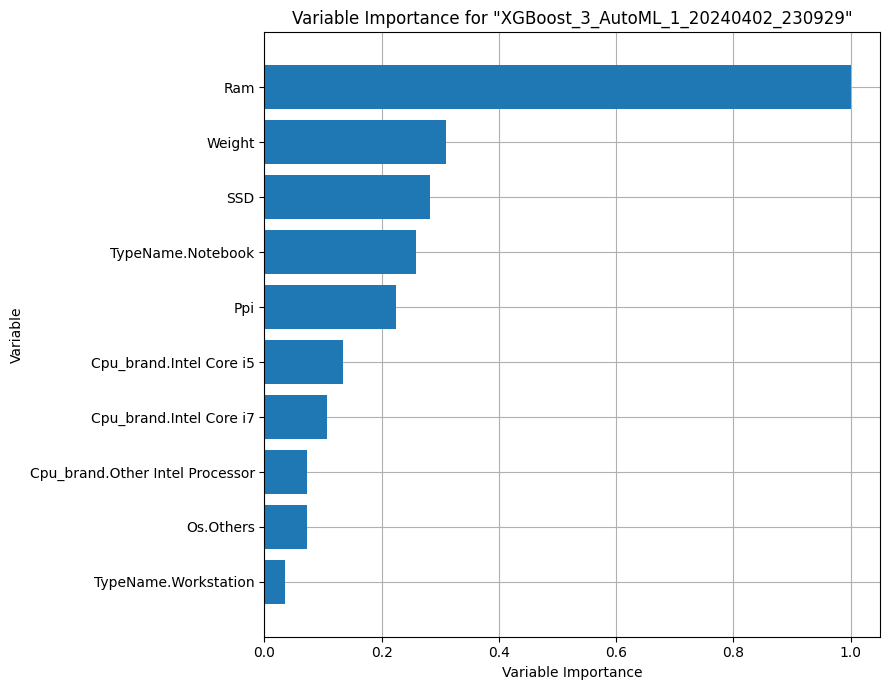

In [22]:
explain_model = aml.explain(frame = test, figsize = (9,7),include_explanations=['varimp'])

# SHAP Explanation

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

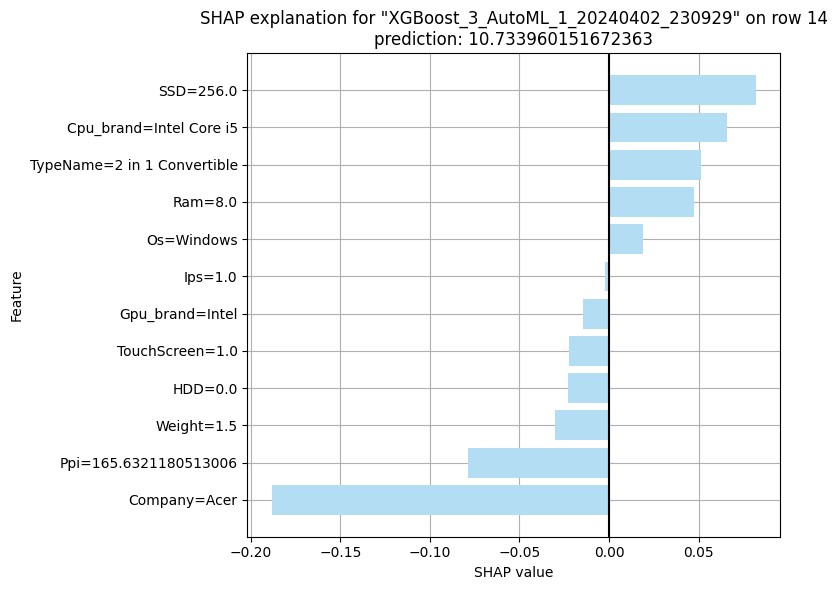

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

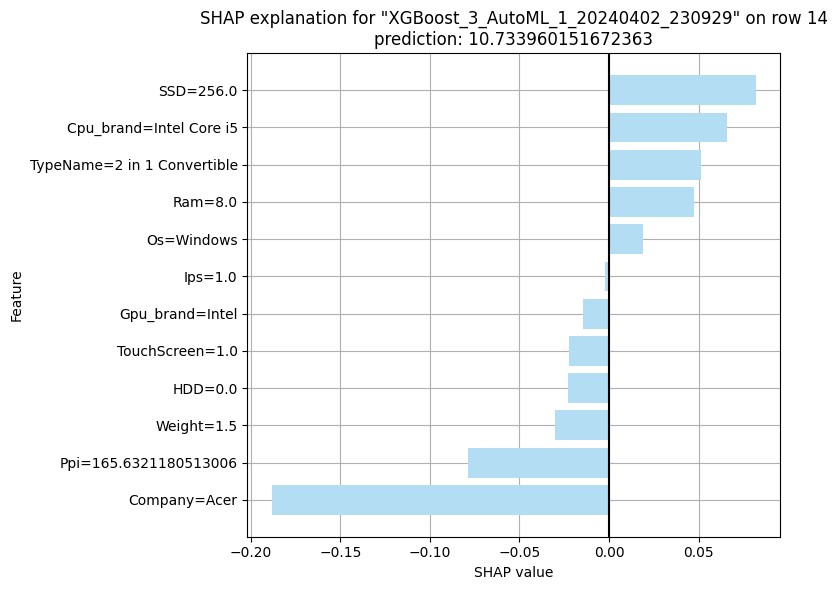

In [24]:
aml.explain_row(frame = test, row_index = 14, figsize = (8,6), exclude_explanations = "leaderboard")


# Decision Tree Classifier

Accuracy Score: 0.8509803921568627
Confusion Matrix:
 [[114  22]
 [ 16 103]]


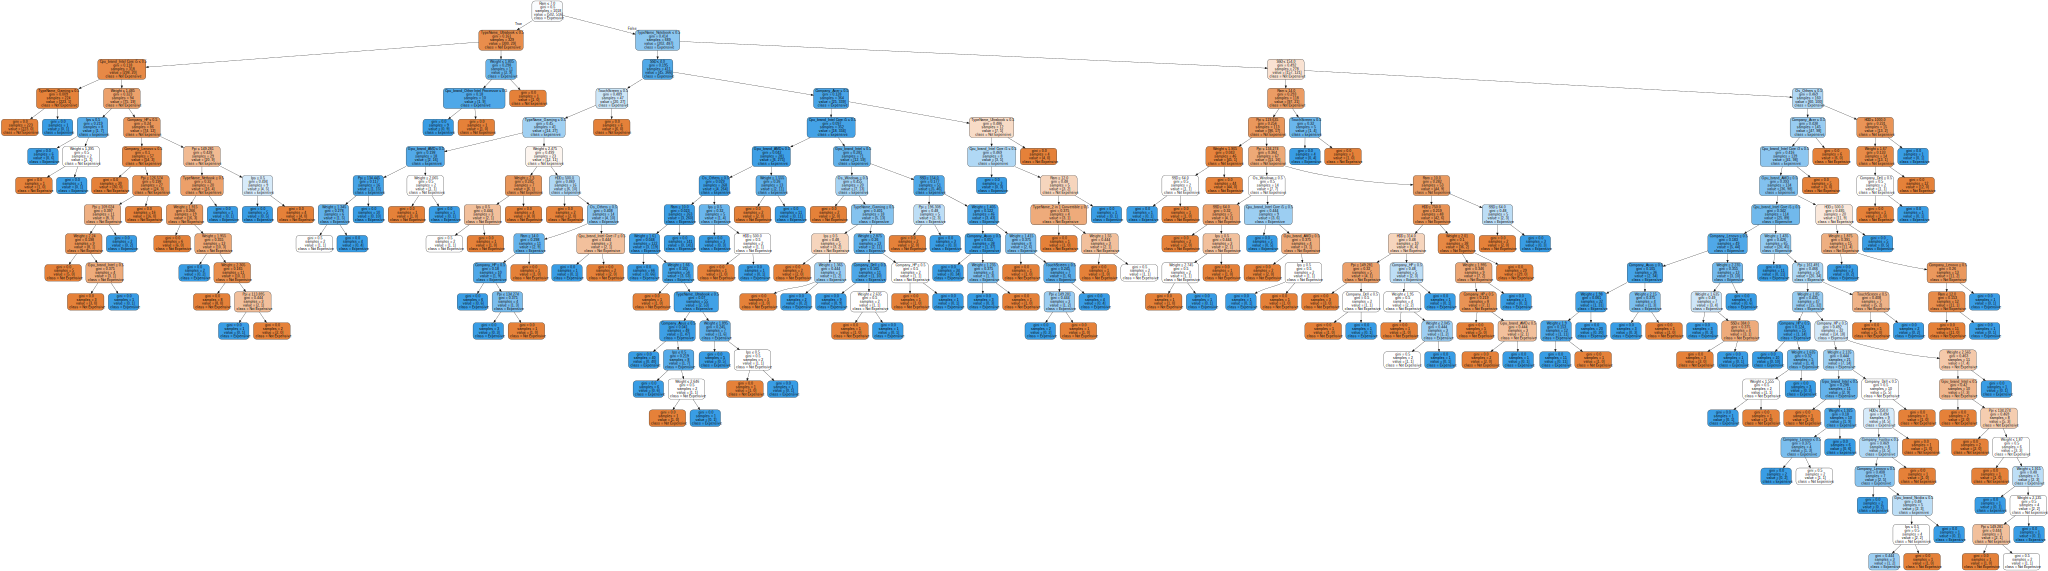

In [28]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import graphviz
import pandas as pd

# Assuming 'laptop_data' is your loaded DataFrame with the laptop data
# Convert the target variable into binary classification for the sake of example
median_price = data['Price'].median()
data['Expensive'] = data['Price'] > median_price
y = data['Expensive']
X = data.drop(['Price', 'Expensive'], axis=1)

# Convert categorical variables to numeric using one-hot encoding
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier on the training set
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Use the decision tree classifier to make predictions on the testing set
y_pred = dtc.predict(X_test)

# Calculate and print accuracy score and confusion matrix
acc_score = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
print("Accuracy Score:", acc_score)
print("Confusion Matrix:\n", conf_mat)

# Visualize the decision tree using graphviz
dot_data = export_graphviz(dtc, out_file=None,
                           feature_names=X_train.columns,
                           class_names=['Not Expensive', 'Expensive'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)

# Display the decision tree
graph


## Interpretting the tree

The Gini value, also known as the Gini index or Gini impurity, is a measure of the impurity or randomness of a set of data, often used in decision trees. In decision trees, the Gini value is used to determine the optimal split at each node based on the purity of the data subsets resulting from the split.

The Gini value ranges from 0 to 1, with 0 indicating perfect purity (all data belongs to the same class) and 1 indicating perfect impurity (data is evenly distributed among all classes). In decision trees, the Gini value is calculated for each potential split, and the split with the lowest Gini value is chosen as the optimal split.

In practice, the Gini value is often used in conjunction with other measures of impurity, such as entropy, to help build more accurate decision trees.

As we have a problem og binary classification the model a split decision at every node depending on the given parameter value.

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'dataset' is your DataFrame
# Define the target variable
dataset['Expensive'] = dataset['Price'] > dataset['Price'].median()  # Binary classification based on median price
y = dataset['Expensive']

# Drop the target and other non-predictive columns
X = dataset.drop(['Price', 'Expensive'], axis=1)

# Encode categorical variables
X_encoded = pd.get_dummies(X)

# Splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                     rmse        mse       mae      rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  --------  ---------  --------  ---------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_1_AutoML_1_20240402_230929     0.192337  0.0369937  0.148929  0.0162135                 0.0369937                2332                   0.61838   StackedEnsemble
XGBoost_grid_1_AutoML_1_20240402_230929_model_30         0.19366   0.0375043  0.1487    0.0162988                 0.0375043                 684                   0.072409  XGBoost
GBM_3_AutoML_1_20240402_230929                           0.194669  0.0378958  0.152457  0.0164316                 0.0378958                 611                   0.048432  GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20240402_230929  0.195172  0.0380923  0.154326  0.0164828                 0.0380923                1278                   0.574822  StackedEnsemble
XGBoost_grid_1_AutoML_1_20240402_230929_model_4          0.19798   0.039196   0.152687  0.0166795                 0.039196                  742                   0.018789  XGBoost
GBM_4_AutoML_1_20240402_230929                           0.198846  0.0395398  0.155831  0.0167562                 0.0395398                 591                   0.0732    GBM
DRF_1_AutoML_1_20240402_230929                           0.199163  0.039666   0.156929  0.0167467                 0.039666                 1221                   0.061434  DRF
GBM_2_AutoML_1_20240402_230929                           0.199516  0.0398065  0.154766  0.0167829                 0.0398065                 502                   0.059738  GBM
GBM_5_AutoML_1_20240402_230929                           0.199592  0.0398369  0.154196  0.0167335                 0.0398369                 630                   0.039613  GBM
GBM_grid_1_AutoML_1_20240402_230929_model_3              0.20065   0.0402606  0.159137  0.0169612                 0.0402606                 490                   0.063535  GBM
XGBoost_grid_1_AutoML_1_20240402_230929_model_18         0.201674  0.0406724  0.150564  0.017099                  0.0406724                 642                   0.018002  XGBoost
XGBoost_grid_1_AutoML_1_20240402_230929_model_2          0.203068  0.0412364  0.156038  0.017202                  0.0412364                2379                   0.026655  XGBoost
XGBoost_grid_1_AutoML_1_20240402_230929_model_19         0.203256  0.0413131  0.154708  0.017184                  0.0413131                 522                   0.061945  XGBoost
XGBoost_grid_1_AutoML_1_20240402_230929_model_29         0.203657  0.0414761  0.164349  0.0171288                 0.0414761                 517                   0.010862  XGBoost
XGBoost_grid_1_AutoML_1_20240402_230929_model_24         0.20396   0.0415997  0.158933  0.0172916                 0.0415997                 862                   0.013907  XGBoost
XGBoost_grid_1_AutoML_1_20240402_230929_model_17         0.204874  0.0419733  0.161623  0.0173481                 0.0419733                 676                   0.016842  XGBoost
GBM_grid_1_AutoML_1_20240402_230929_model_2              0.206772  0.0427548  0.163508  0.0174188                 0.0427548                 552                   0.064658  GBM
GBM_grid_1_AutoML_1_20240402_230929_model_1              0.207222  0.042941   0.165305  0.0175719                 0.042941                  462                   0.048129  GBM
XGBoost_1_AutoML_1_20240402_230929                       0.207406  0.0430173  0.160364  0.0175764                 0.0430173                3045                   0.047881  XGBoost
XGBoost_3_AutoML_1_20240402_230929                       0.208218  0.0433549  0.160852  0.0177435                 0.0433549                1207                   0.050224  XGBoost
[20 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

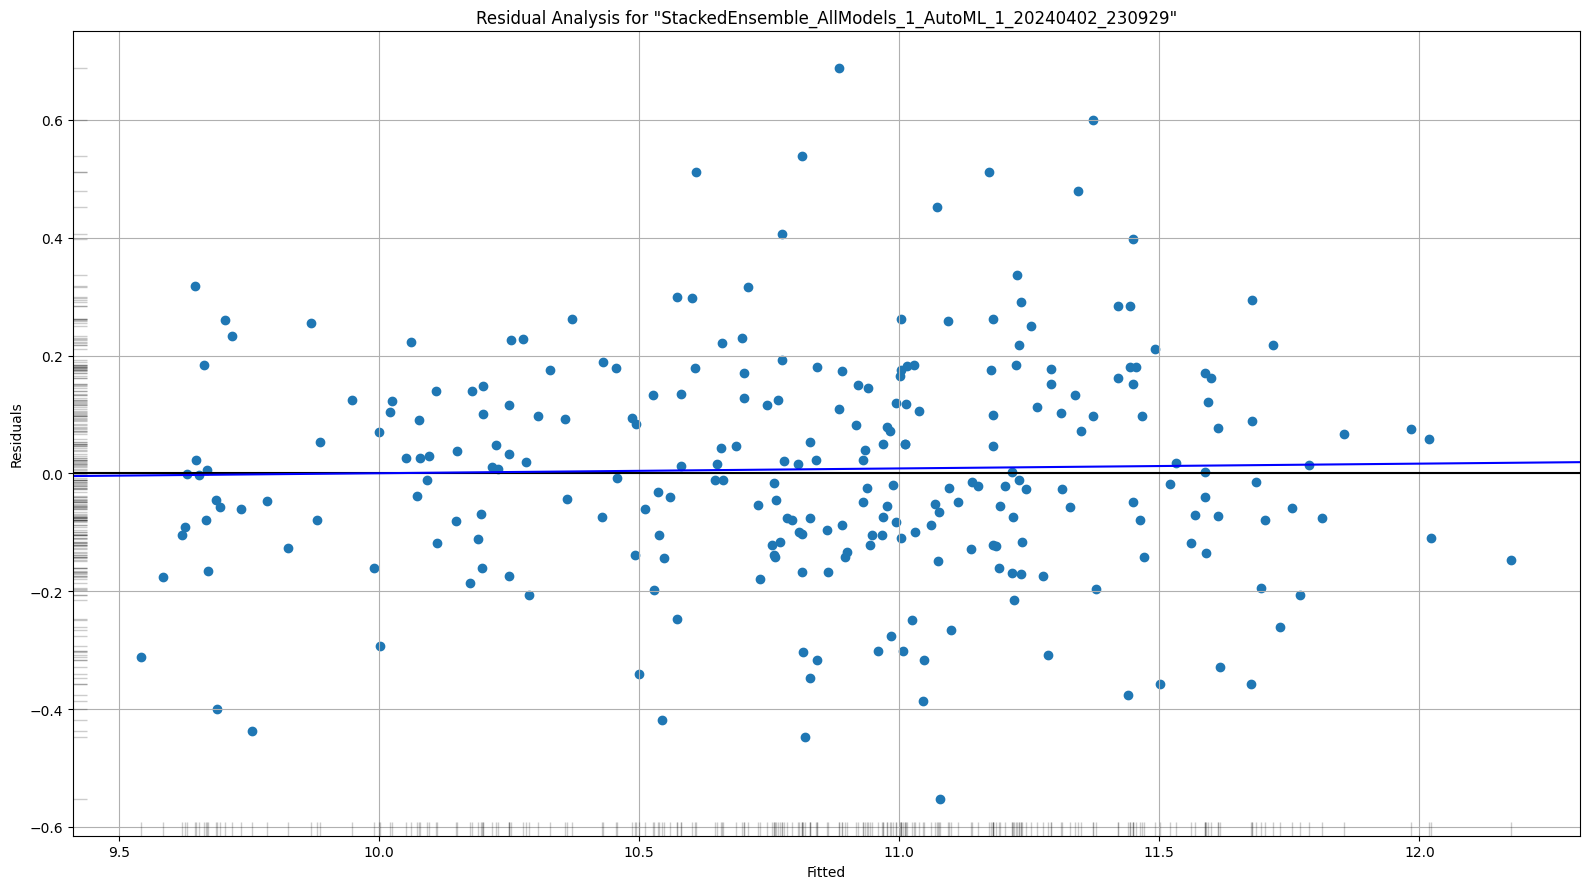

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

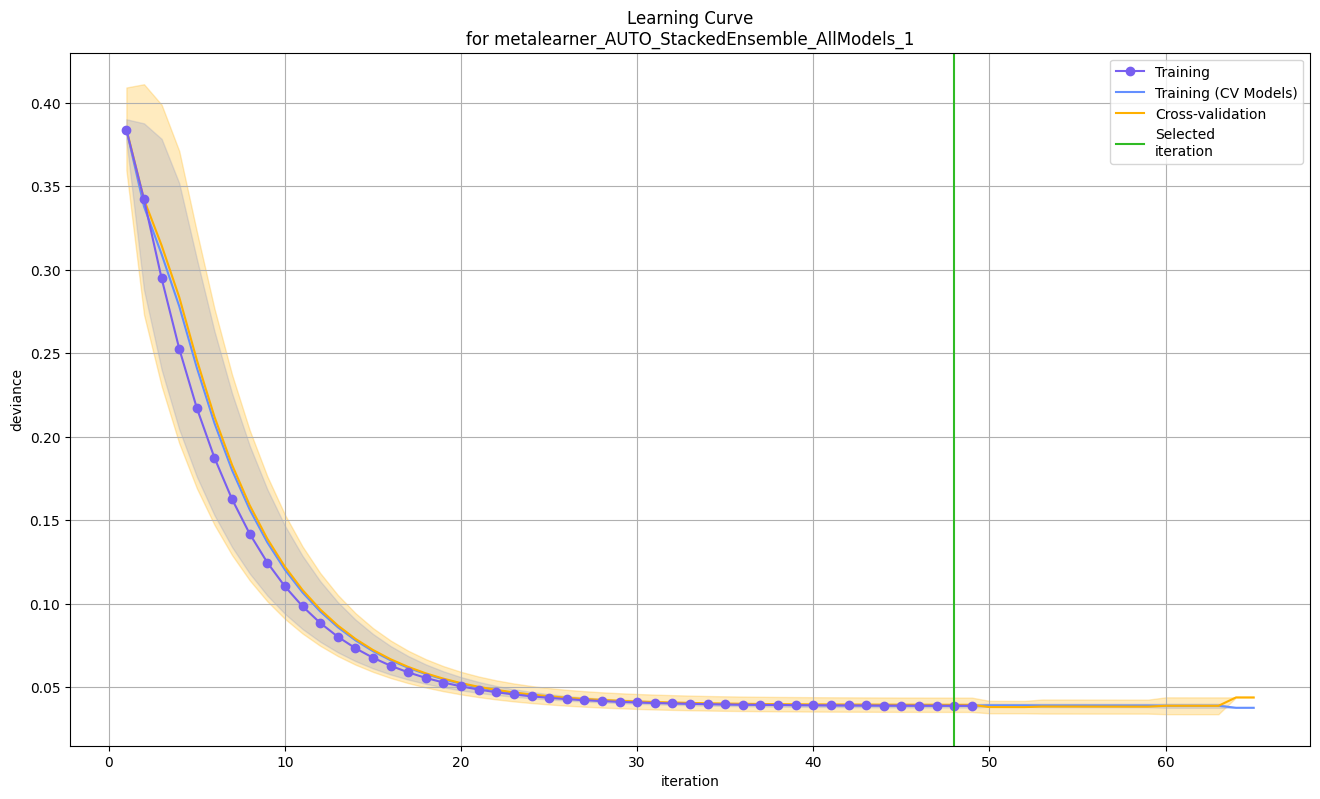

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

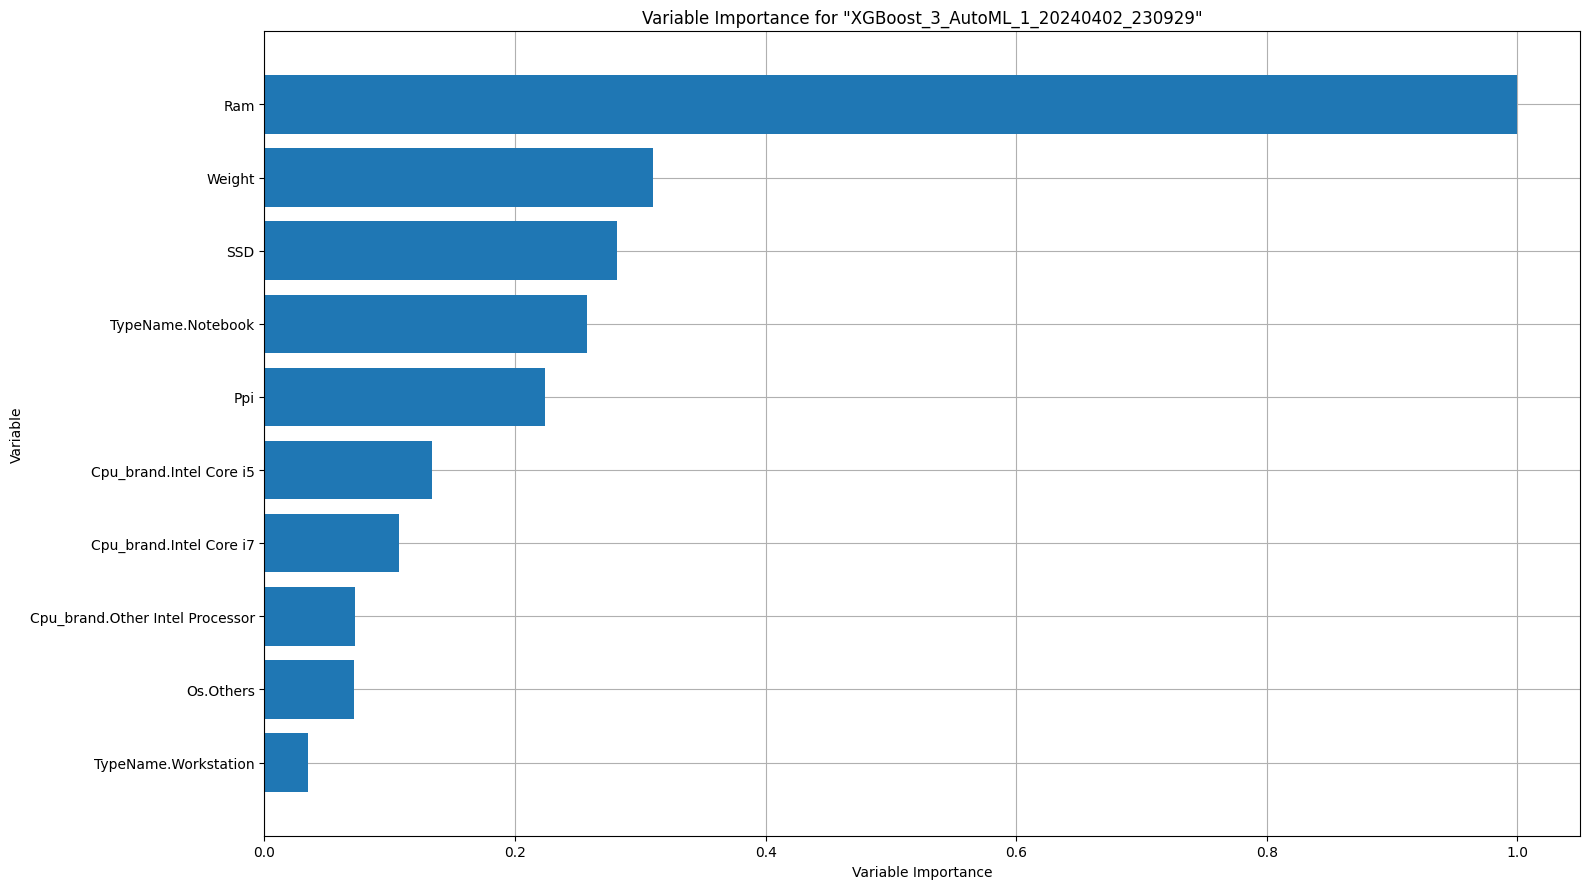

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

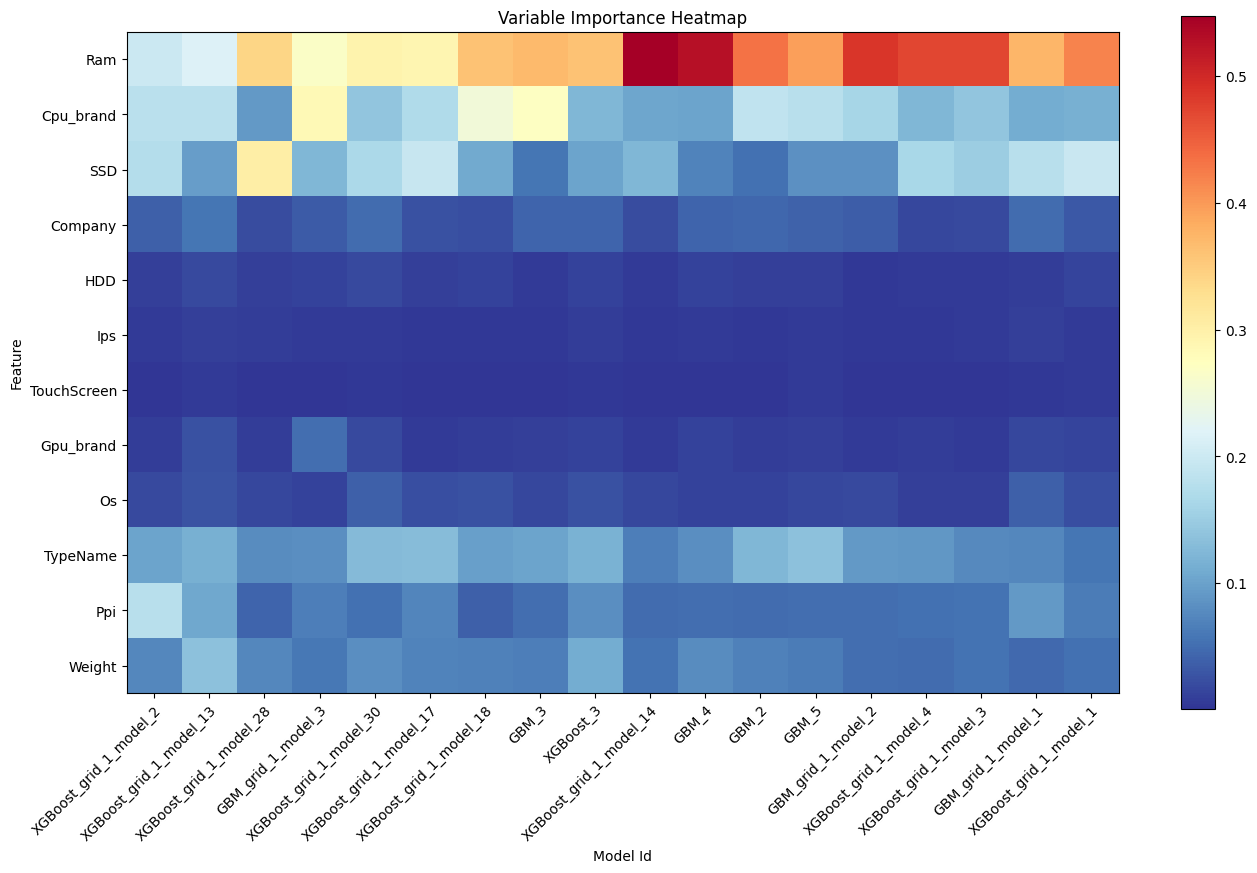

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

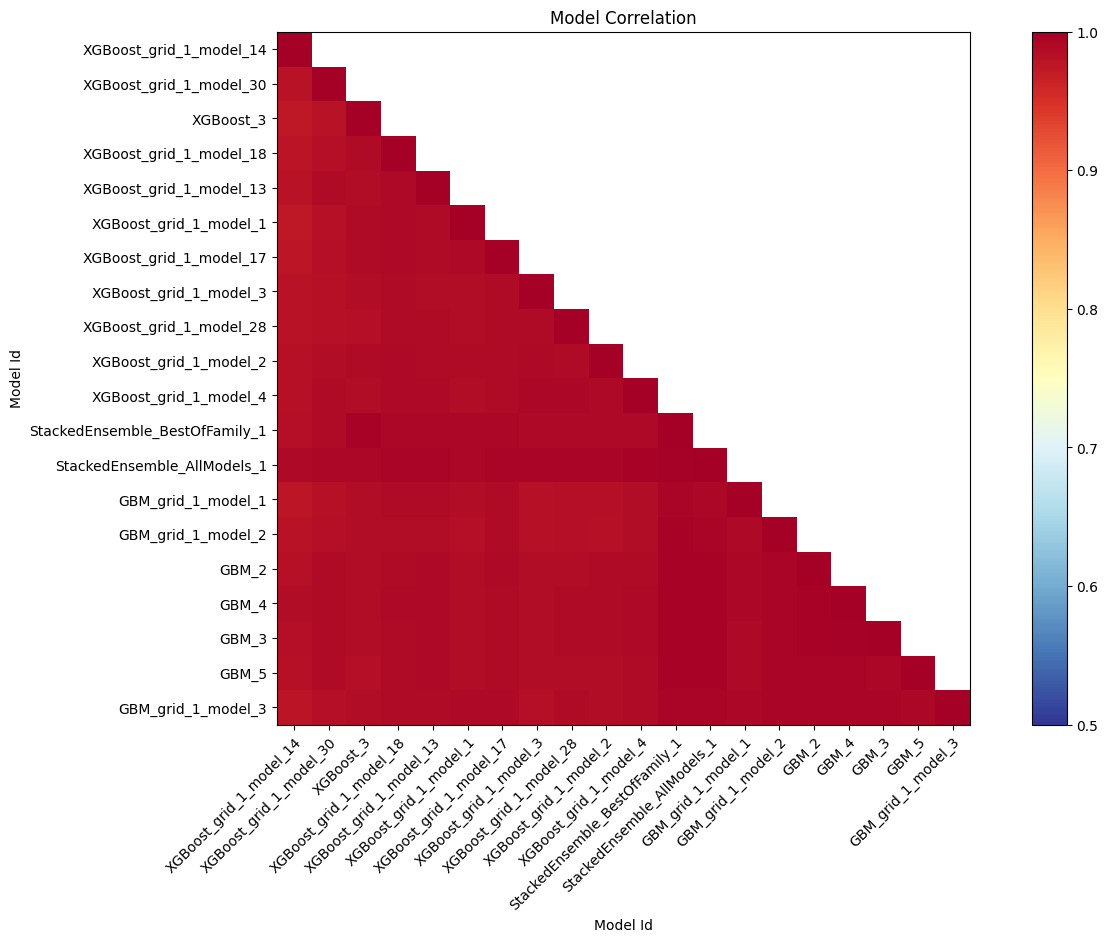

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

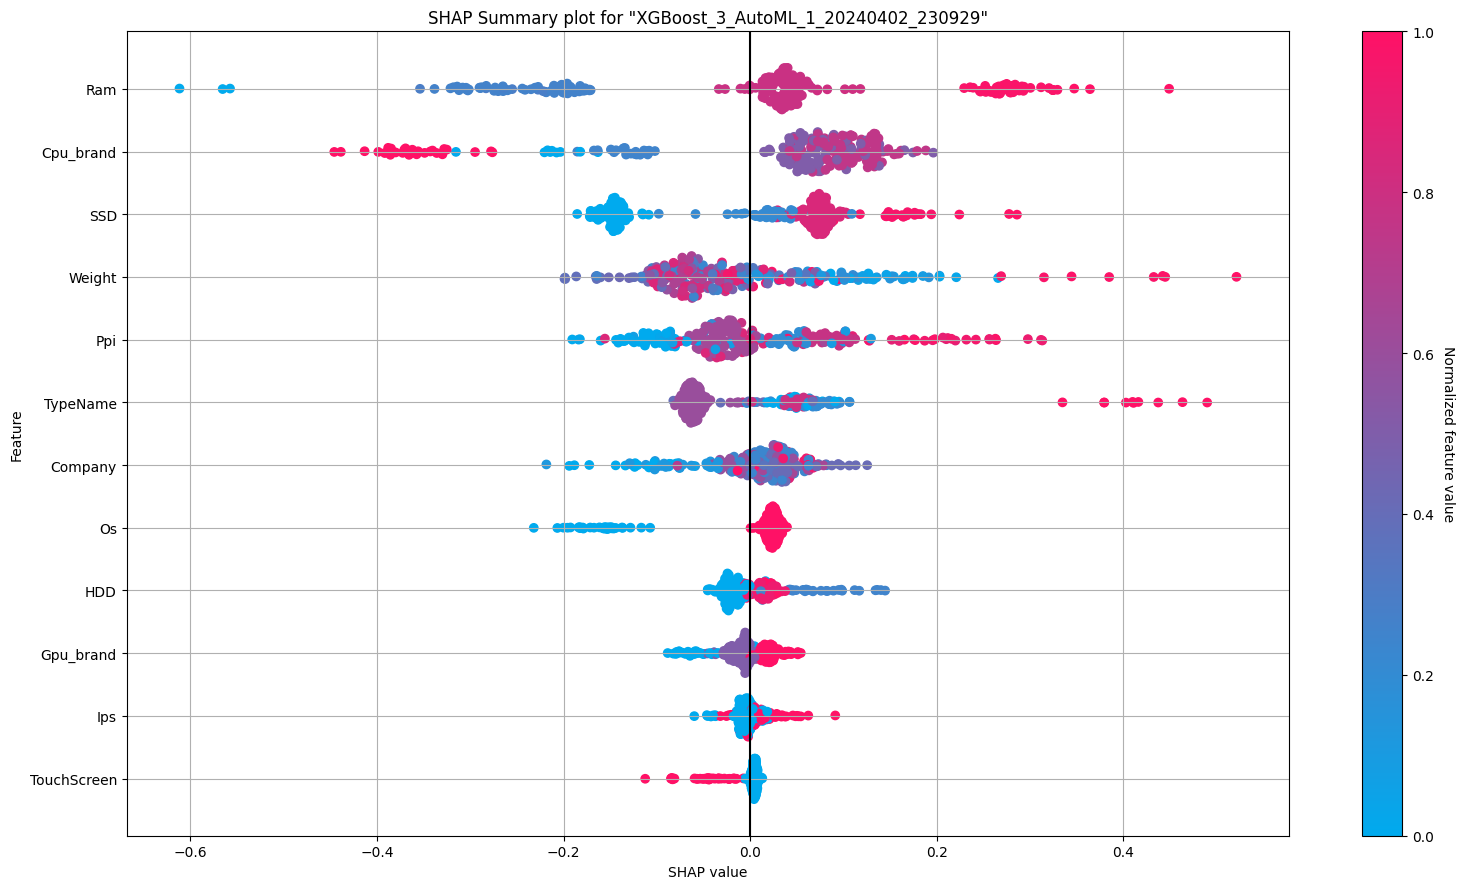

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

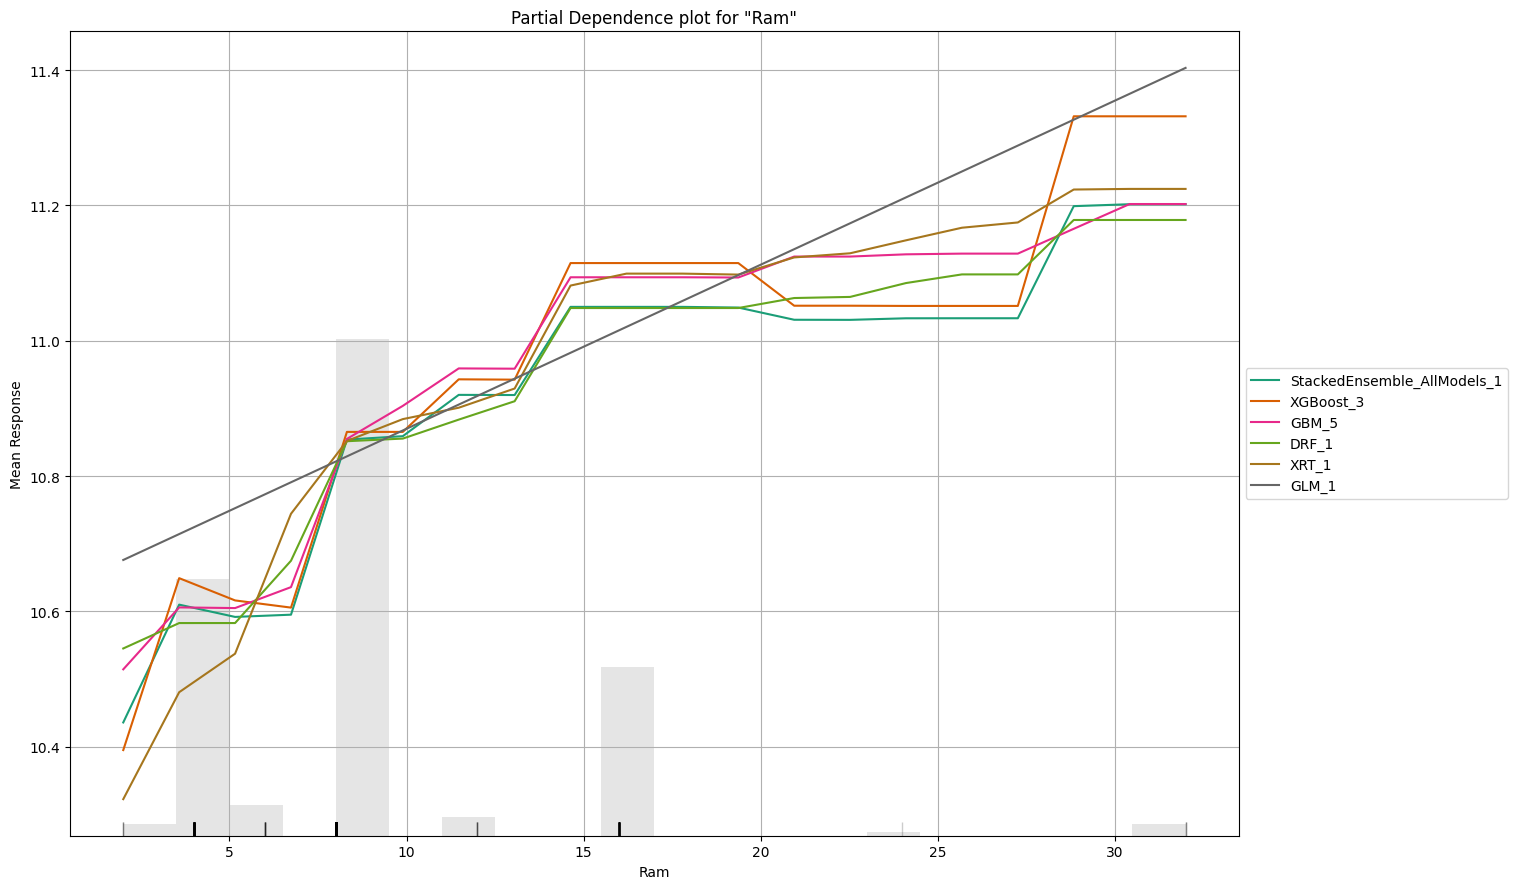

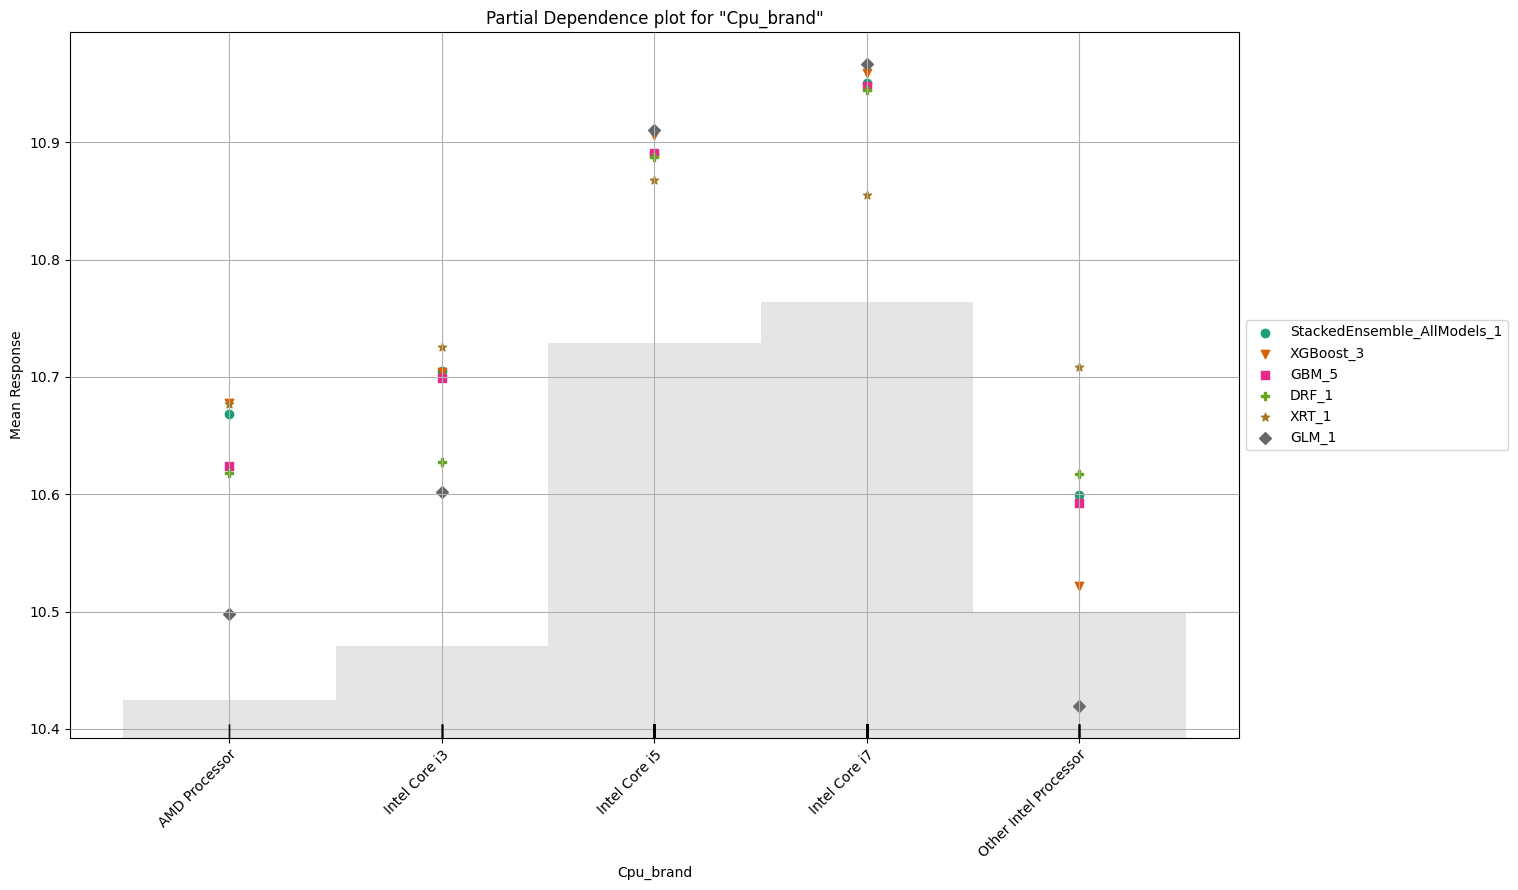

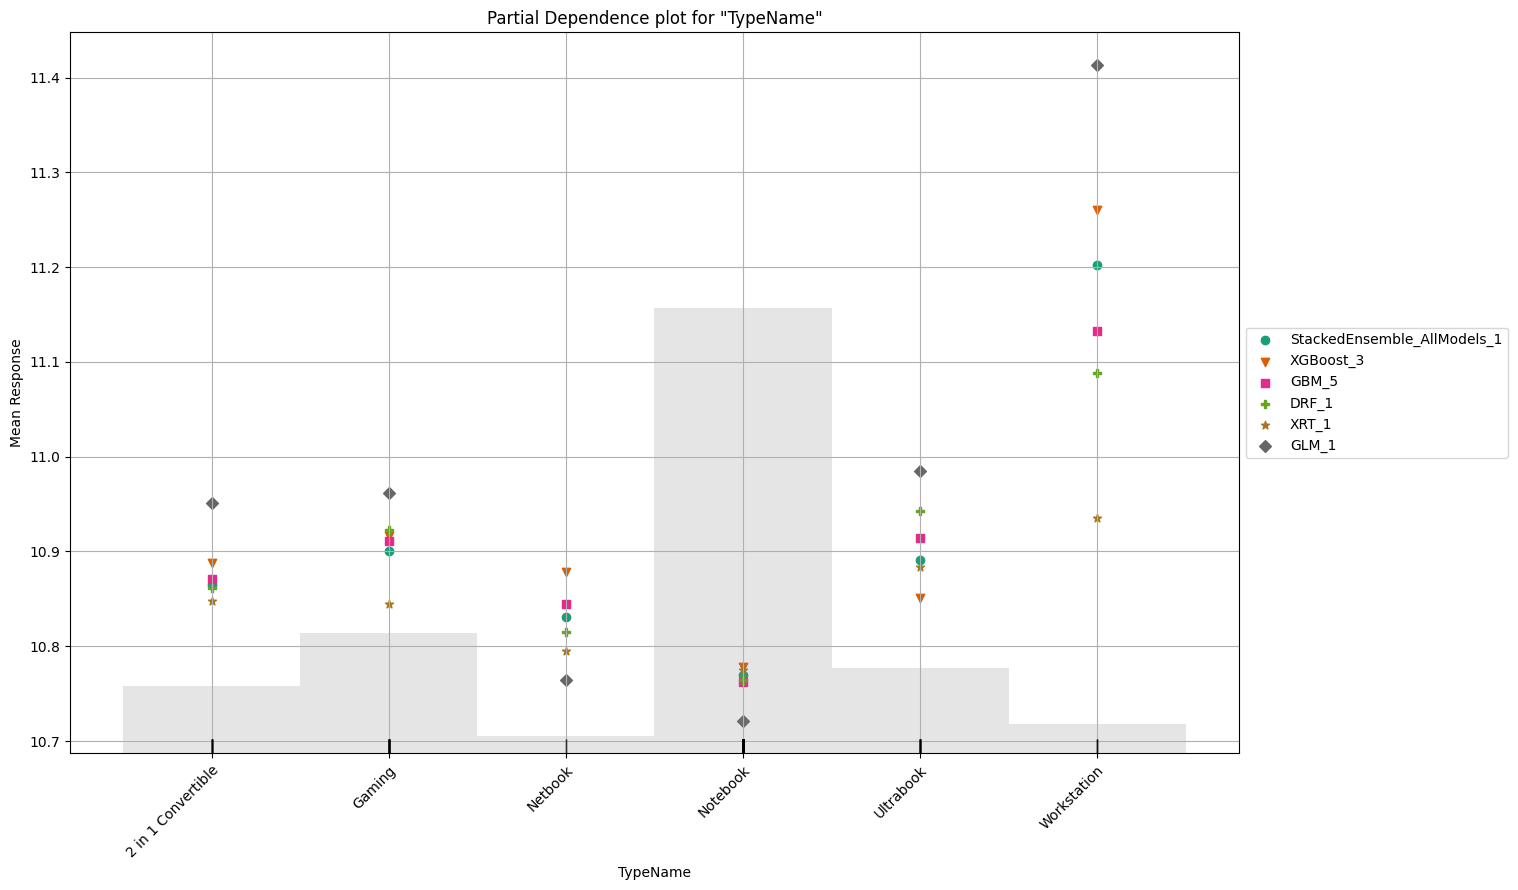

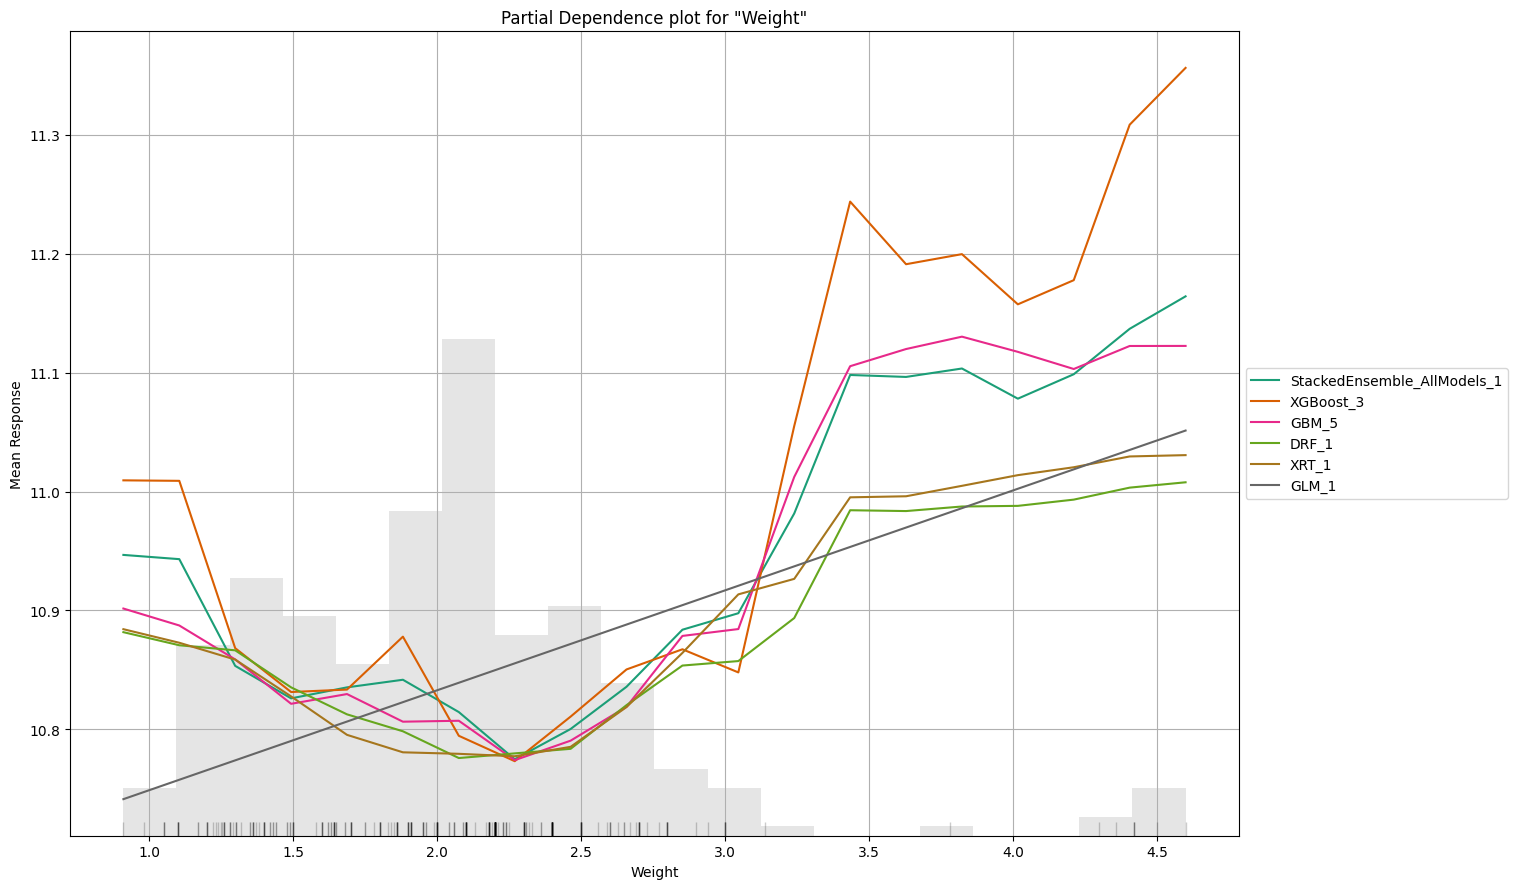

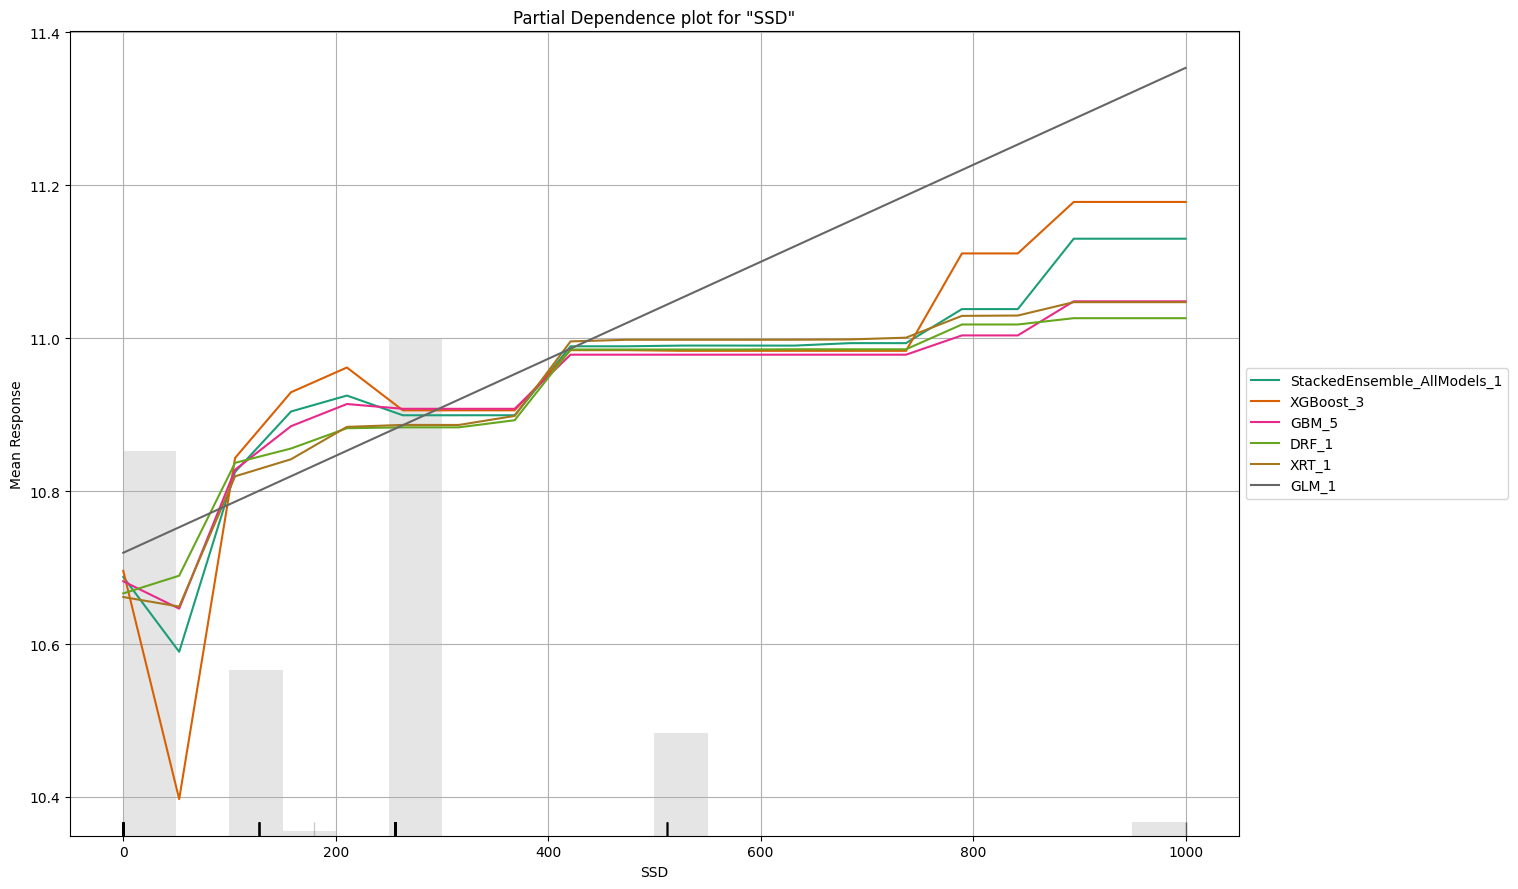

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

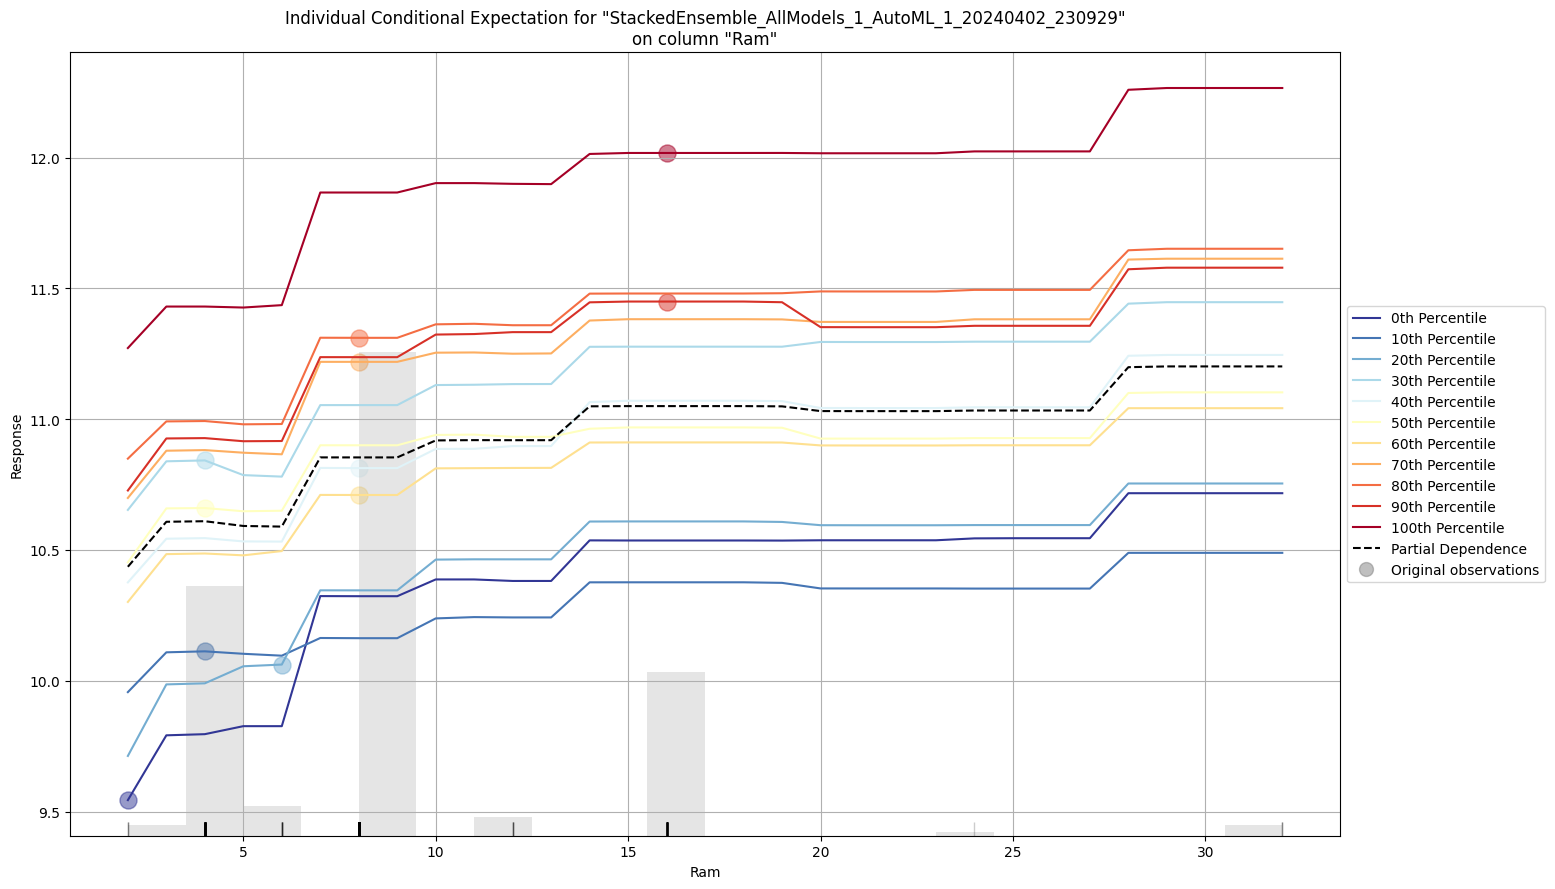

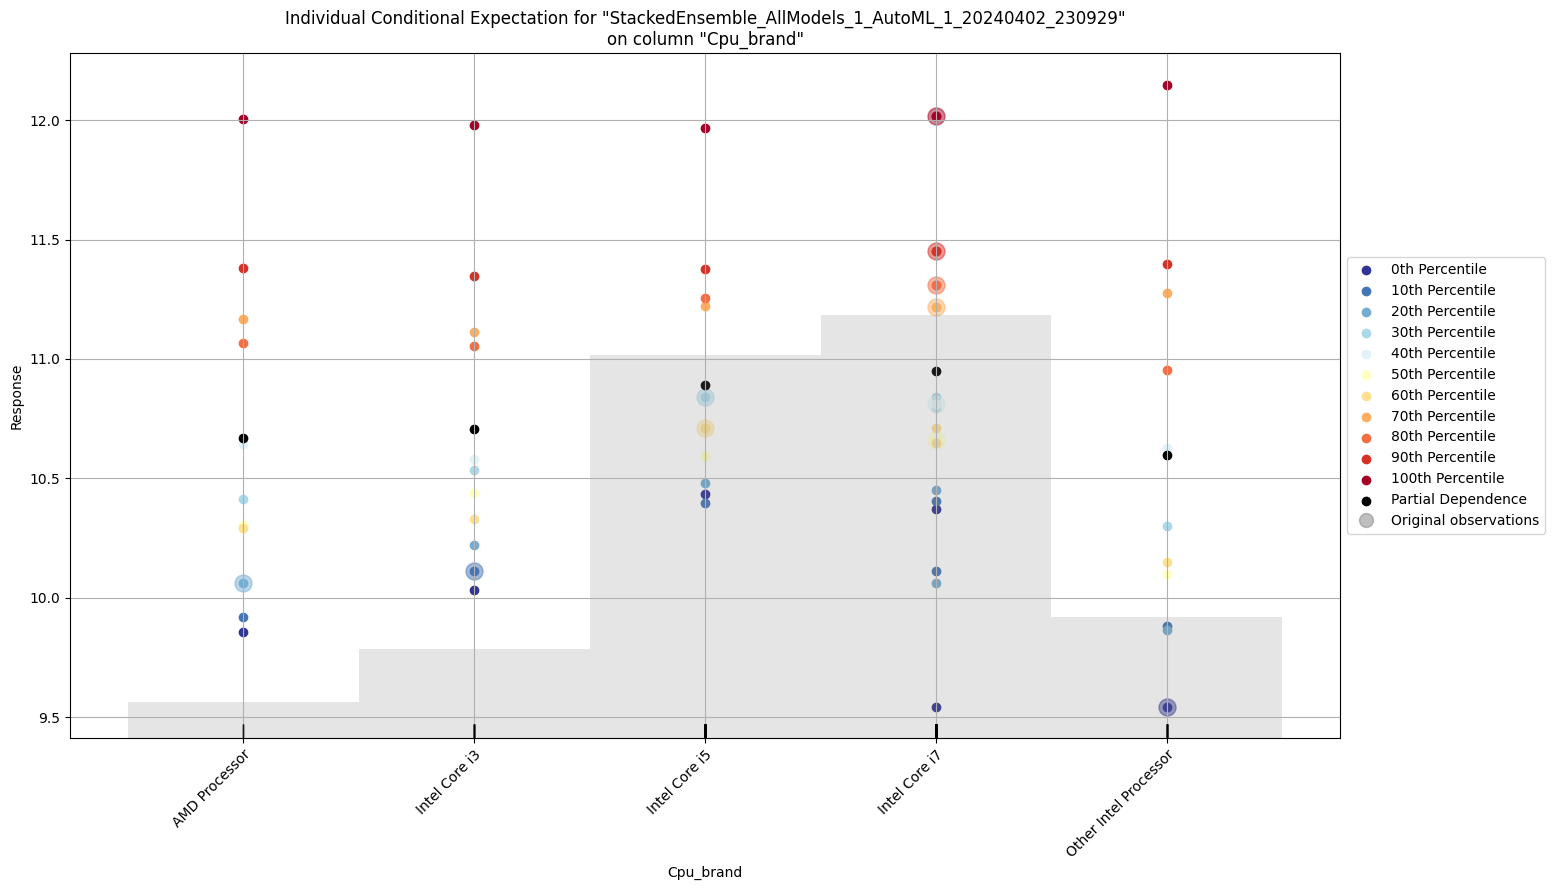

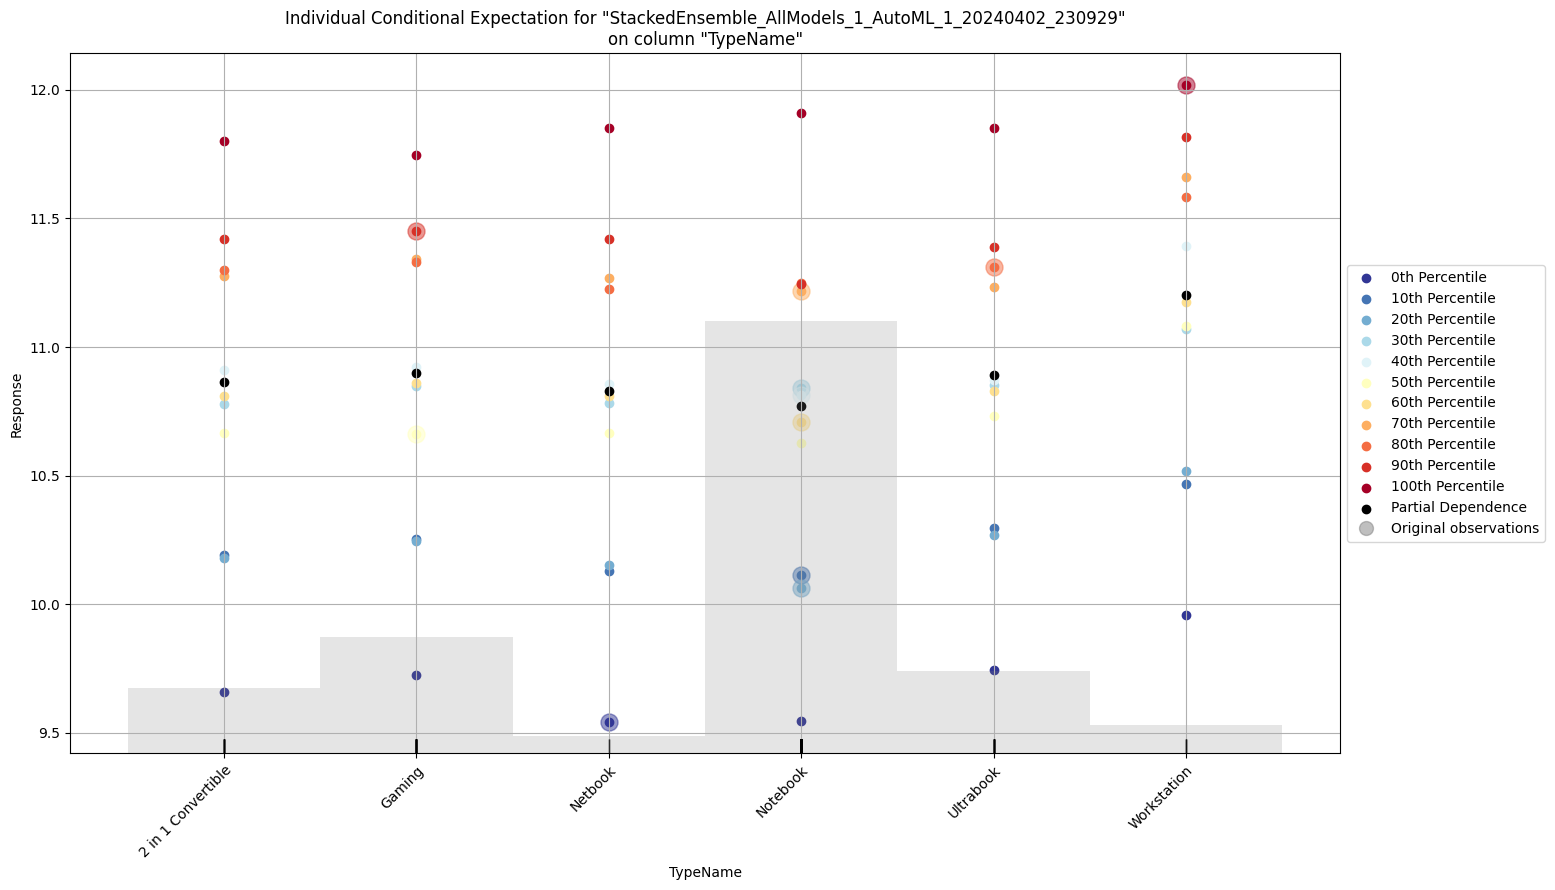

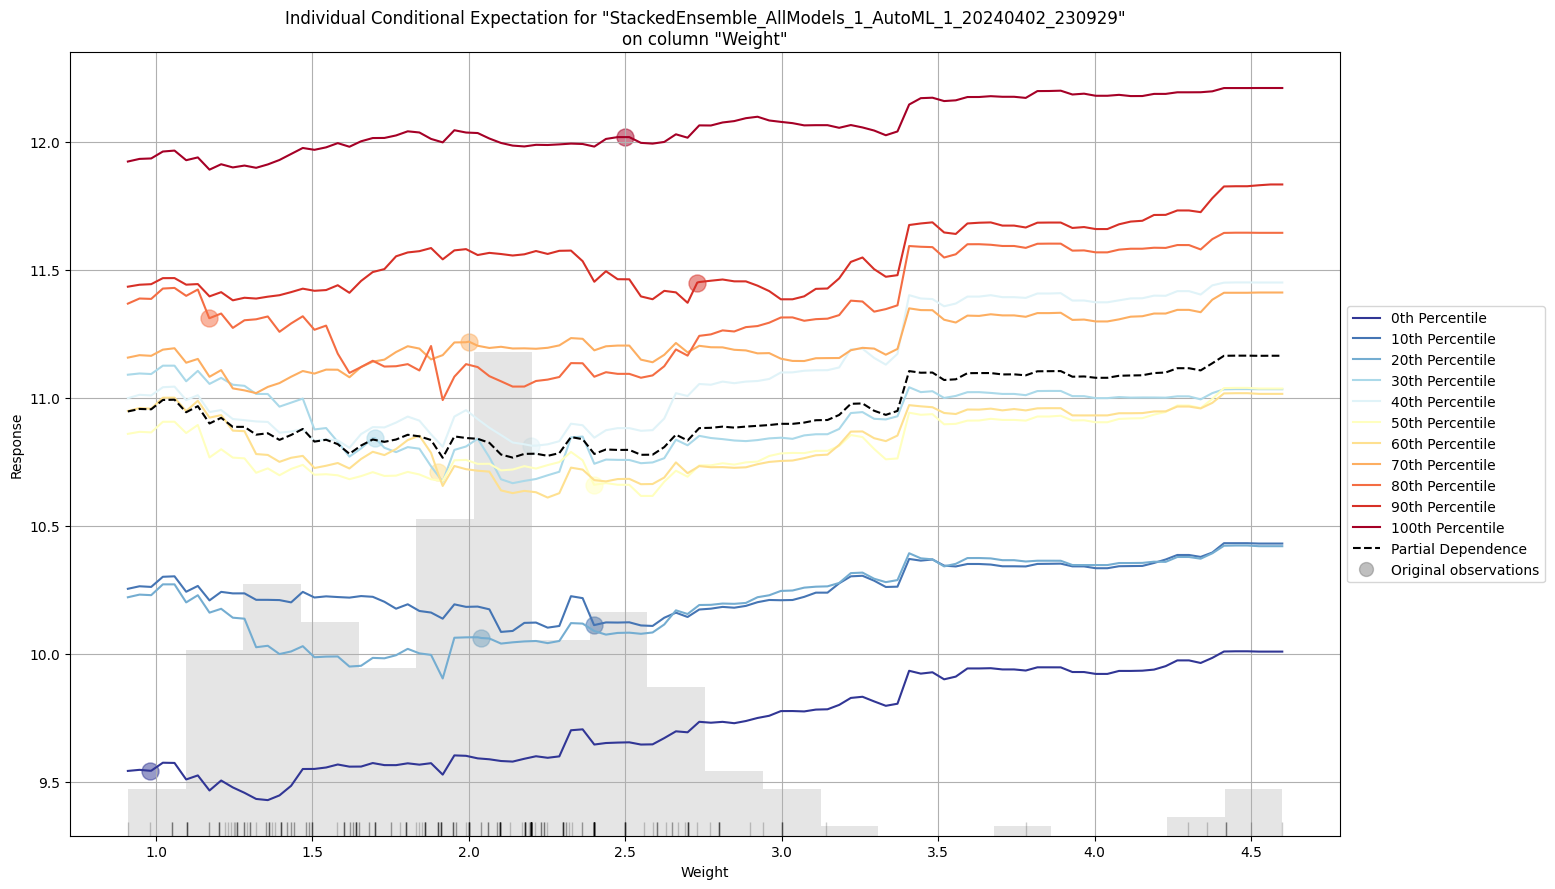

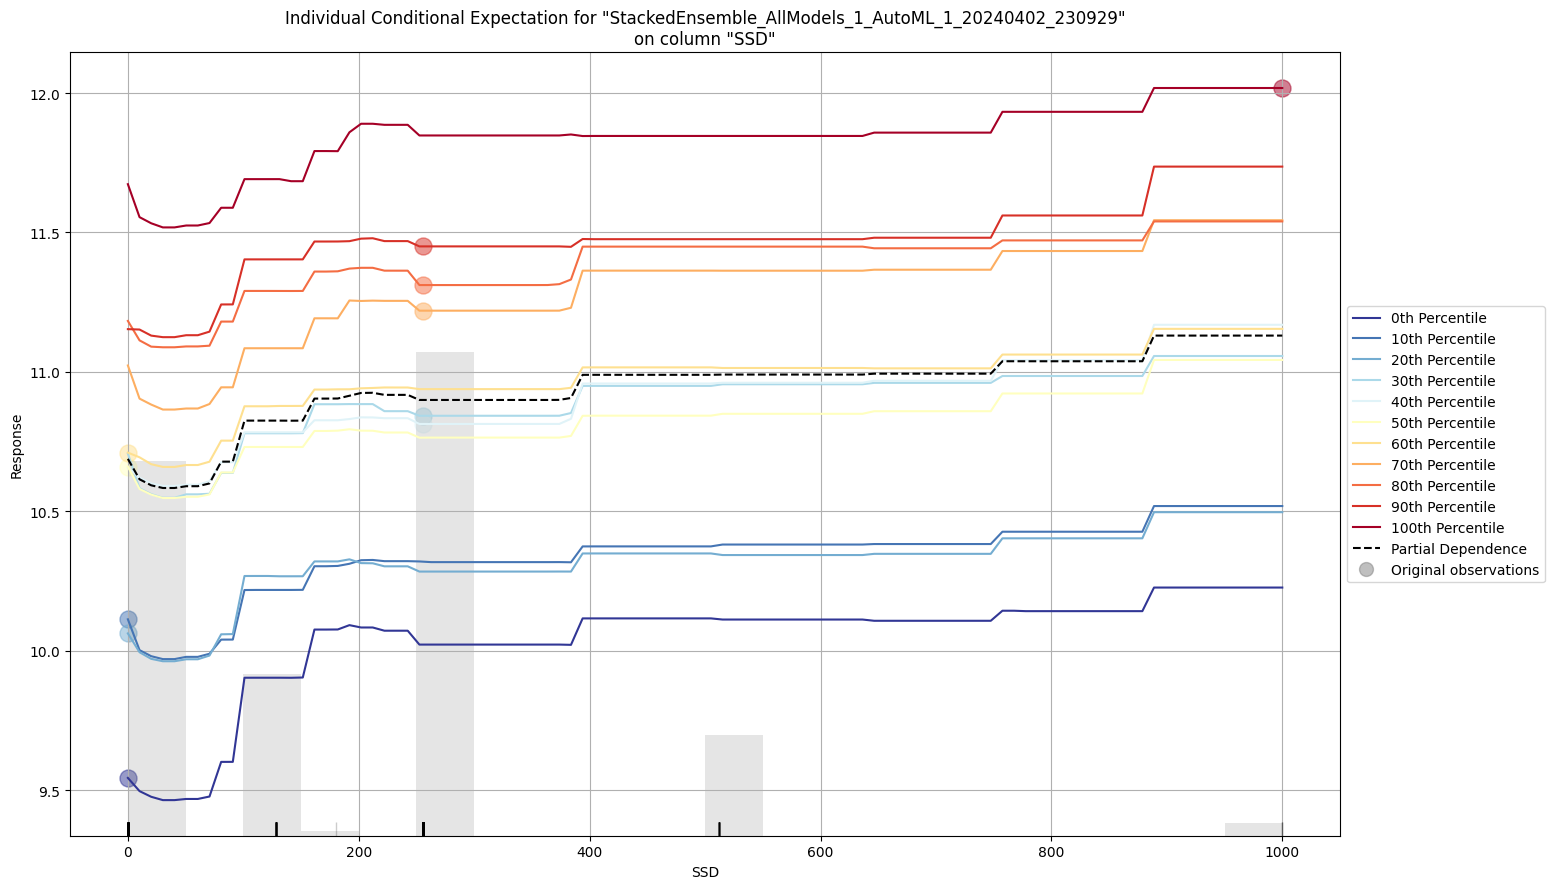

In [43]:
exa = aml.explain(test)

**1. What is the question**

Ans. Given the laptop dataset, the main objective is to predict whether a laptop is classified as "expensive" or "not expensive" based on its specifications and features. This involves analyzing various attributes of laptops, such as RAM, weight, processor type, and brand, to determine their influence on the laptop's price category.

**2. Answers to questions**

Ans. We trained a decision tree model to classify laptops as "expensive" or "not expensive" based on their specifications. We then visualized and interpreted the decision tree to understand the key features influencing a laptop's price category.

**3. How well did it work?**

Ans. The decision tree model demonstrated good potential in classifying laptops as "expensive" or "not expensive" based on specifications, offering clear insights into the features that most influence laptop pricing.

**4. What did you learn?**

Ans. We learned that feature selection and model tuning are crucial in predicting laptop price categories. The importance of specifications varies, highlighting the need for careful analysis and model choice to understand what drives a laptop's classification as "expensive" or "not expensive."

# **Conclusion**

Leveraging the laptop dataset, we engineered a Decision Tree Classifier aimed at discerning laptops into binary categories: "expensive" versus "not expensive," predicated on their technical specifications. This endeavor illuminated the criticality of feature engineering and model hyperparameter optimization within the predictive modeling process. The decision tree's interpretability facilitated an in-depth understanding of the determinants driving laptop pricing categories, underscoring the variance in feature importance.

Although the decision tree model elucidated the framework of feature influence on laptop pricing, future enhancements could entail the adoption of sophisticated ensemble methods or advanced machine learning algorithms to elevate prediction fidelity. Subsequent research directions might incorporate ensemble learning techniques, such as Random Forests or Gradient Boosting Machines, and explore hyperparameter tuning strategies to refine model performance.

Moreover, the exploration could extend to leveraging regularization techniques to mitigate overfitting and employing cross-validation methods to ensure model generalizability across disparate dataset partitions. The iterative process of model evaluation and refinement, employing metrics such as accuracy, precision, recall, and the F1 score, will be crucial in augmenting the predictive capability of the models.

In summary, this analytical journey through the laptop dataset has underscored the paramount importance of methodical feature selection, model complexity balance, and the potential of ensemble methods in enhancing predictive accuracy within the domain of laptop price categorization.

**References**

H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

ChatGPT - https://chat.openai.com/chat

**MIT License**

Copyright (c) 2024 Vamsi2215

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.